In [4]:
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format='retina'

import os

import numpy as np

In [5]:
class DataProcessing:

    def __init__(self, file_path_1, file_path_2):
        self.file_path_1 = file_path_1
        self.file_path_2 = file_path_2
        pass

    def load_data(self, skip_rows, index_col):
        data_1 = pd.read_csv(self.file_path_1, sep=",", skipinitialspace=True, skiprows=skip_rows,
                           parse_dates=[index_col], index_col=index_col, low_memory=False)
        data_1.index = pd.to_datetime(data_1.index, unit='ms', origin='unix')

        data_2 = pd.read_csv(self.file_path_2, sep=",", skipinitialspace=True, skiprows=skip_rows,
                             parse_dates=[index_col], index_col=index_col, low_memory=False)
        data_2.index = pd.to_datetime(data_2.index, unit='ms', origin='unix')

        print(self.file_path_1, "loaded.")
        print("Shape :", data_1.shape)

        print(self.file_path_2, "loaded.")
        print("Shape :", data_2.shape)

        return data_1, data_2

    @staticmethod
    def plot_data(data, x_label, y_label, dir_name, file_name):
        dir_name = './logs/plots/' + dir_name
        
        min_time = data.index.min()
        max_time = data.index.max()
        delta = max_time - min_time
        shape = data.shape
        print("Start :\n", min_time)
        print("End :\n", max_time)
        print('Time delta :\n', delta)
        print('\nShape :\n', shape)

        data.plot(figsize=(20, 10), linewidth=2, layout=(2, 1), fontsize=20)
        plt.xlabel(x_label, fontsize=32);
        plt.ylabel(y_label, fontsize=32);
        plt.suptitle(str(min_time) + ' to ' + str(max_time) 
                     + '\nTime delta : ' + str(delta) + '\nShape : ' + str(shape),
                     fontsize=25)

        plt.tight_layout()
        plt.subplots_adjust(top=0.83)
        
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
            
        plt.savefig(dir_name + '/' + file_name + '.jpg', dpi=300)
        plt.show()

    @staticmethod
    def plot_data_comp(data_1, data_2, x_label, y_label, dir_name, file_name):
        dir_name = './logs/subplots/' + dir_name
        
        fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, linewidth=2)

        data_1.plot(figsize=(25, 15), linewidth=2, layout=(2, 1), fontsize=20, ax=axes[0])
        data_2.plot(figsize=(25, 15), linewidth=2, layout=(2, 1), fontsize=20, ax=axes[1])
        
        min_time = data_1.index.min()
        max_time = data_1.index.max()
        delta = max_time - min_time
        print("Start :\n", min_time)
        print("End :\n", max_time)
        print('Time delta :\n', delta)
        
        plt.xlabel(x_label, fontsize=32);
        fig.text(0.06,0.53, y_label, ha="center", va="center", rotation=90, fontsize=32)
        plt.suptitle(str(min_time) + ' to ' + str(max_time) 
                     + '\nTime delta : ' + str(delta),
                     fontsize=25, y=0.95)
        
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        
        plt.savefig(dir_name + '/' + file_name + '.jpg', dpi=300)
        plt.show()

# Loading data

In [6]:
file_path_E8508BDFF2AE = './data/E8508BDFF2AE/CLT (20200709_195219).txt'
file_path_F4428F5EB41D = './data/F4428F5EB41D/CLT (20200709_195222).txt'
data_processing = DataProcessing(file_path_E8508BDFF2AE, file_path_F4428F5EB41D)
data_1, data_2 = data_processing.load_data(1, 'timestamp')

./data/E8508BDFF2AE/CLT (20200709_195219).txt loaded.
Shape : (445773, 16)
./data/F4428F5EB41D/CLT (20200709_195222).txt loaded.
Shape : (432418, 16)


In [339]:
data_1.head()

mag_x  mag_y  mag_z  mag_acc     acc_x     acc_y  \
timestamp                                                                   
2020-07-09 10:52:20.770  -10.2   19.5  -46.0        3  0.644040  3.403358   
2020-07-09 10:52:20.784  -10.2   19.5  -46.0        3  0.636858  3.345897   
2020-07-09 10:52:20.785  -10.2   19.5  -46.0        3  0.636858  3.345897   
2020-07-09 10:52:20.785  -10.2   19.5  -46.0        3  0.636858  3.345897   
2020-07-09 10:52:20.786  -10.2   19.5  -46.0        3  0.636858  3.345897   

                            acc_z  acc_acc    gyro_x    gyro_y    gyro_z  \
timestamp                                                                  
2020-07-09 10:52:20.770  9.475053        3  0.078830  0.142745  0.033023   
2020-07-09 10:52:20.784  9.524135        3  0.078830  0.142745  0.033023   
2020-07-09 10:52:20.785  9.524135        3  0.078830  0.142745  0.033023   
2020-07-09 10:52:20.785  9.524135        3  0.075634  0.121440  0.033023   
2020-07-09 10:52:20.786  9.524135        3  0.075634  0.121440  0.033023   

                         gyro_acc    pos_lat     pos_lng  pos_acc update_from  
timestamp                                                                      
2020-07-09 10:52:20.770         3  35.145675  129.007296   12.965         GPS  
2020-07-09 10:52:20.784         3  35.145675  129.007296   12.965         acc  
2020-07-09 10:52:20.785         3  35.145675  129.007296   12.965         mag  
2020-07-09 10:52:20.785         3  35.145675  129.007296   12.965        gyro  
2020-07-09 10:52:20.786         3  35.145675  129.007296   12.965         acc

In [340]:
data_2.head()

mag_x  mag_y      mag_z  mag_acc     acc_x     acc_y  \
timestamp                                                                       
2020-07-09 10:52:26.064  -23.1   -3.1 -50.600002        3 -0.396240  4.759673   
2020-07-09 10:52:26.068  -23.1   -3.1 -50.600002        3 -0.339977  4.763264   
2020-07-09 10:52:26.069  -23.1   -3.1 -50.600002        3 -0.339977  4.763264   
2020-07-09 10:52:26.069  -23.1   -3.1 -50.600002        3 -0.339977  4.763264   
2020-07-09 10:52:26.076  -23.1   -3.1 -50.600002        3 -0.361524  4.788404   

                            acc_z  acc_acc    gyro_x    gyro_y    gyro_z  \
timestamp                                                                  
2020-07-09 10:52:26.064  8.582016        3  0.045806 -0.003196 -0.030893   
2020-07-09 10:52:26.068  8.522161        3  0.045806 -0.003196 -0.030893   
2020-07-09 10:52:26.069  8.522161        3  0.045806 -0.003196 -0.030893   
2020-07-09 10:52:26.069  8.522161        3  0.042611 -0.009587 -0.028762   
2020-07-09 10:52:26.076  8.535329        3  0.042611 -0.009587 -0.028762   

                         gyro_acc   pos_lat     pos_lng  pos_acc update_from  
timestamp                                                                     
2020-07-09 10:52:26.064         3  35.14803  129.006742   1700.0         GPS  
2020-07-09 10:52:26.068         3  35.14803  129.006742   1700.0         acc  
2020-07-09 10:52:26.069         3  35.14803  129.006742   1700.0         mag  
2020-07-09 10:52:26.069         3  35.14803  129.006742   1700.0        gyro  
2020-07-09 10:52:26.076         3  35.14803  129.006742   1700.0         acc

## Plotting data

### First data

Start :
 2020-07-09 10:52:20.770000
End :
 2020-07-09 11:05:40.811000
Time delta :
 0 days 00:13:20.041000

Shape :
 (445773, 16)


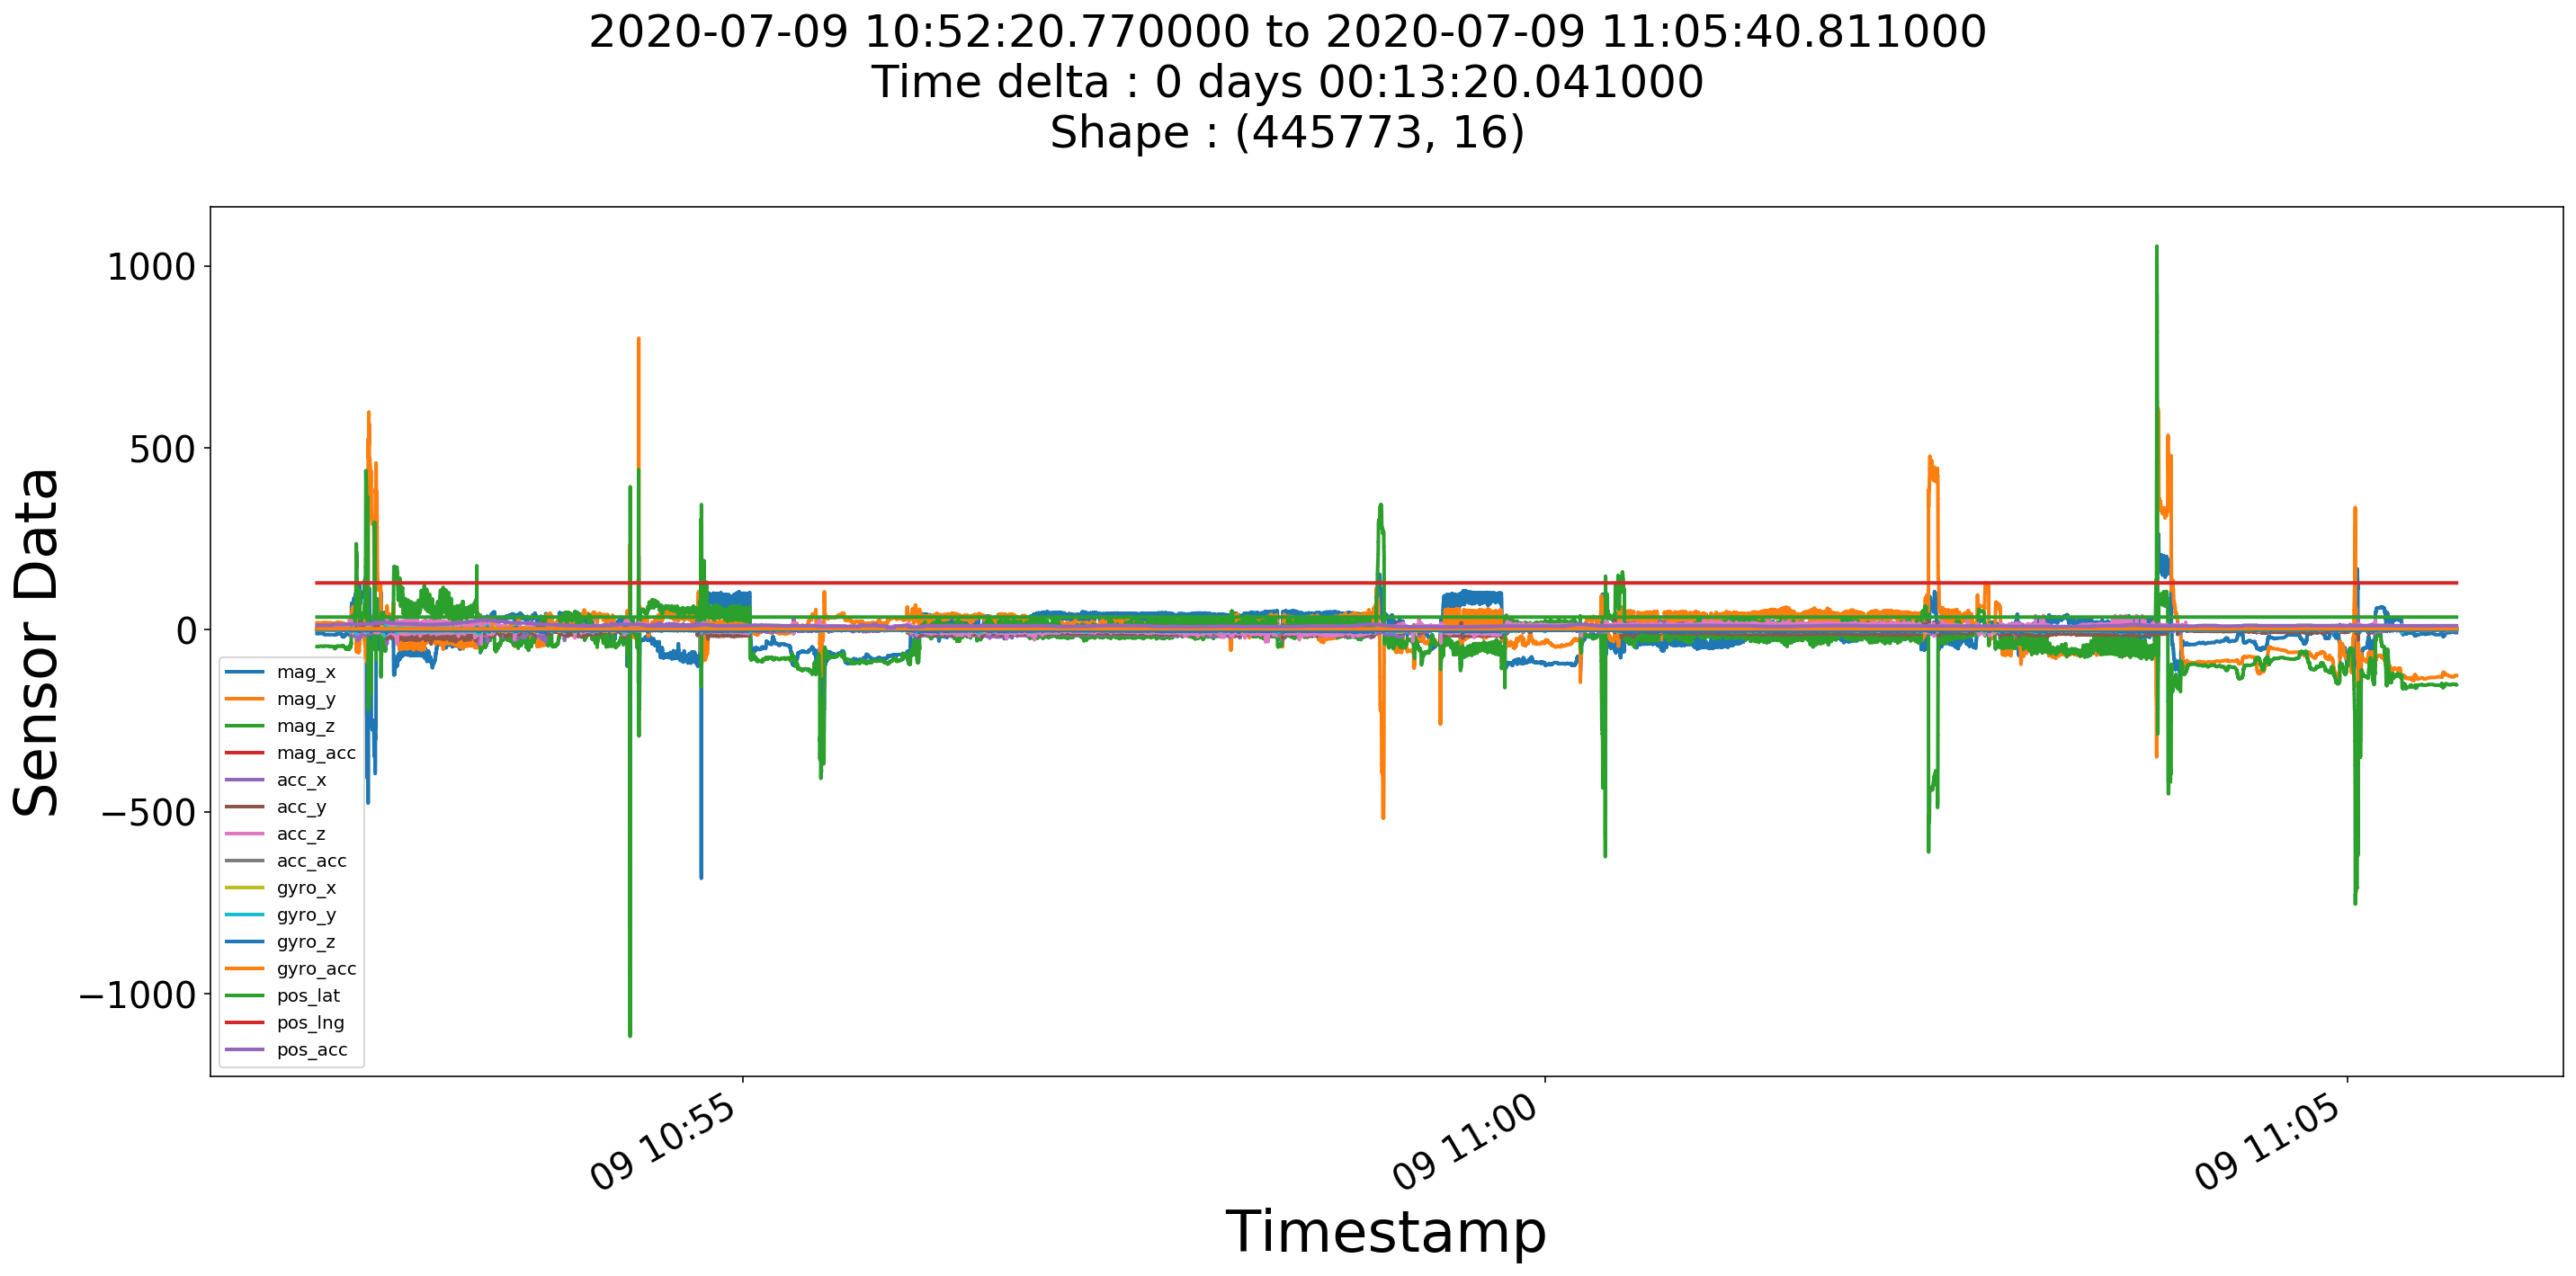

In [341]:
data_processing.plot_data(data_1, 'Timestamp', 'Sensor Data', 'E8508BDFF2AE', '20200709_195219')

Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:54:59.999000
Time delta :
 0 days 00:01:59.997000

Shape :
 (65603, 16)


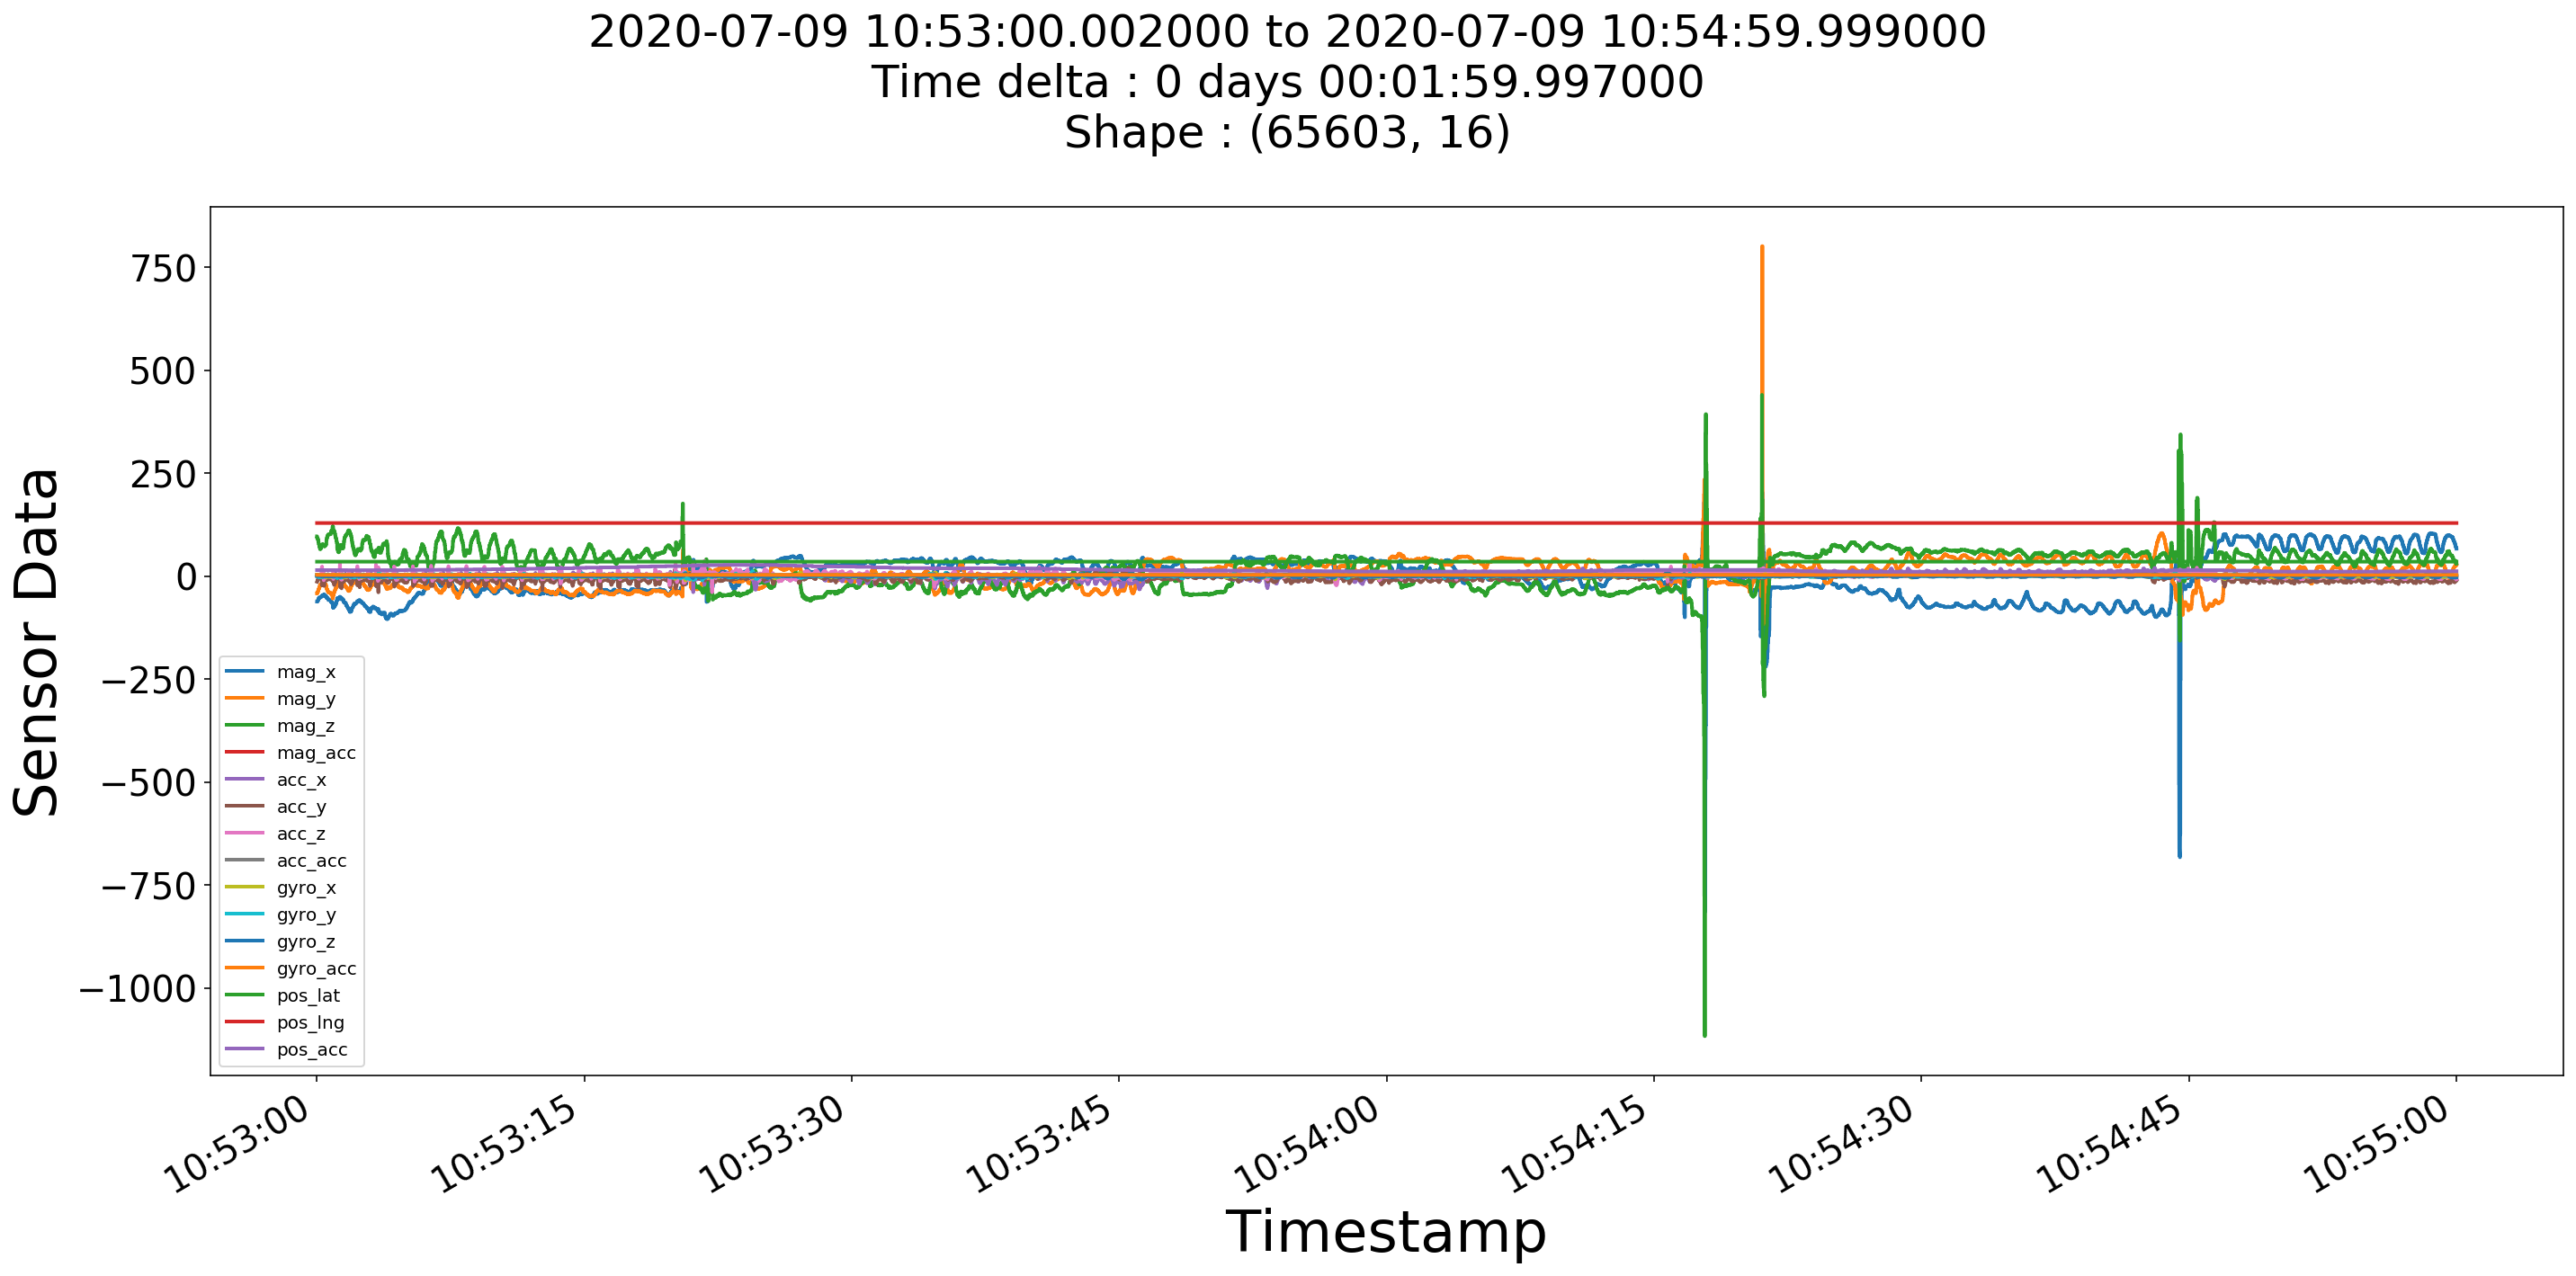

In [342]:
data_processing.plot_data(data_1["2020-07-09 10:53":"2020-07-09 10:54"],
                          'Timestamp', 'Sensor Data', 'E8508BDFF2AE', '20200709_195219_st1')

### Second data

Start :
 2020-07-09 10:52:26.064000
End :
 2020-07-09 11:05:40.748000
Time delta :
 0 days 00:13:14.684000

Shape :
 (432418, 16)


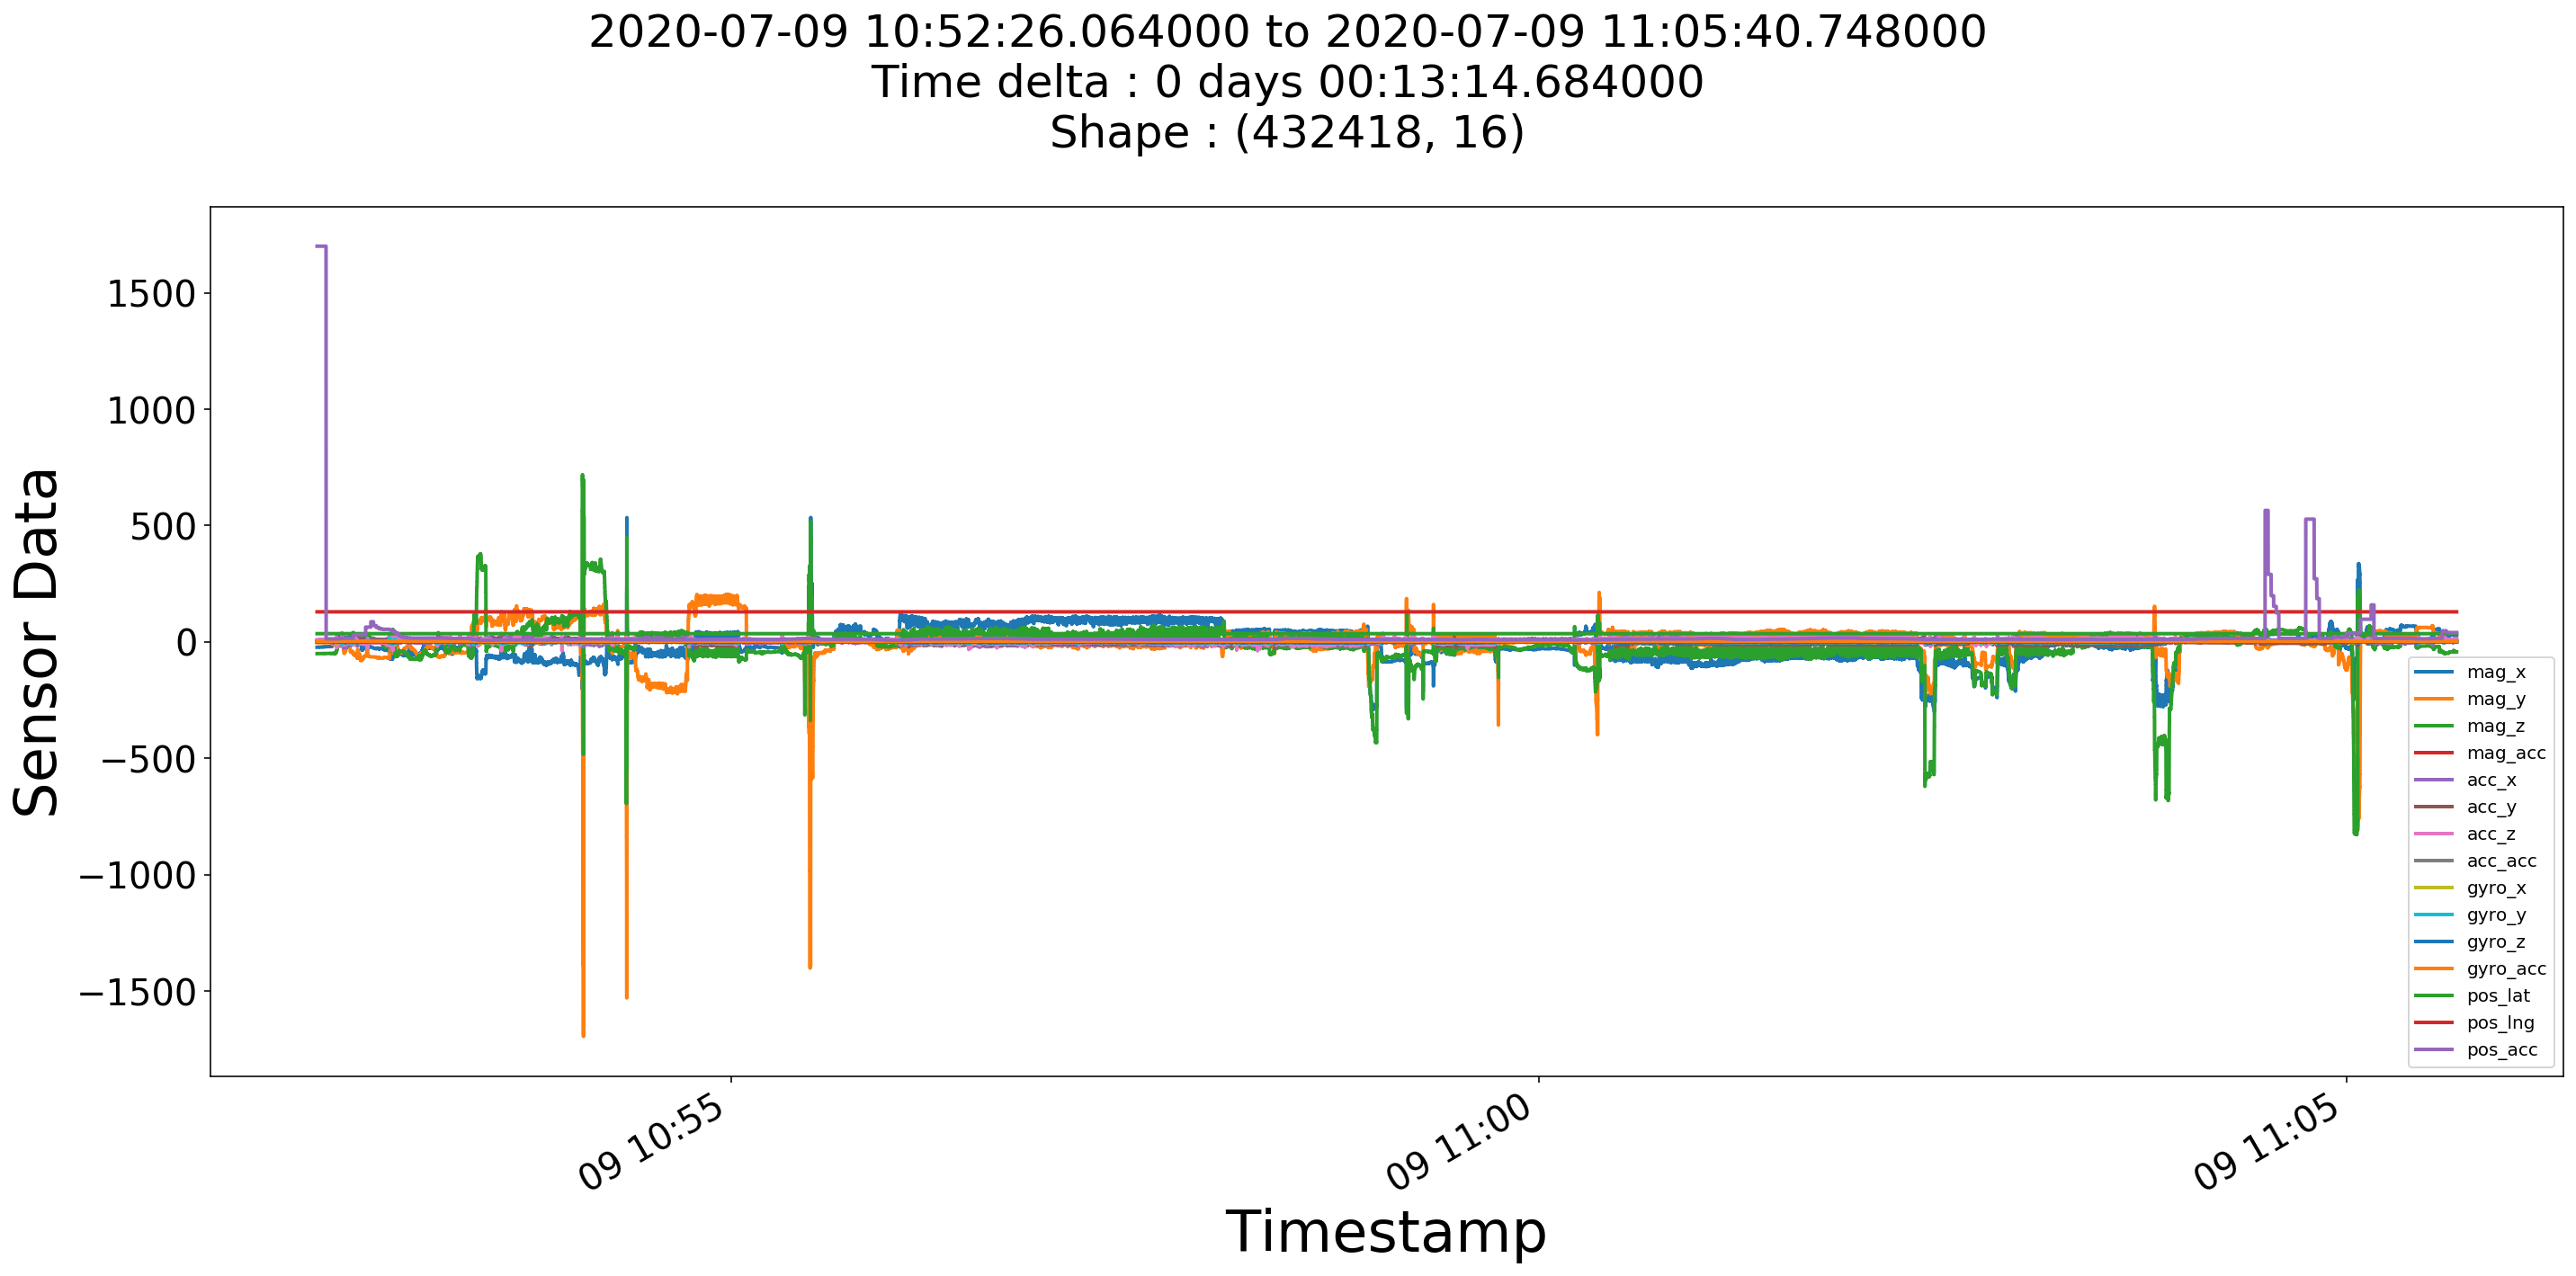

In [343]:
data_processing.plot_data(data_2, 'Timestamp', 'Sensor Data', 'F4428F5EB41D', '20200709_195222')

Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:54:59.999000
Time delta :
 0 days 00:01:59.999000

Shape :
 (64720, 16)


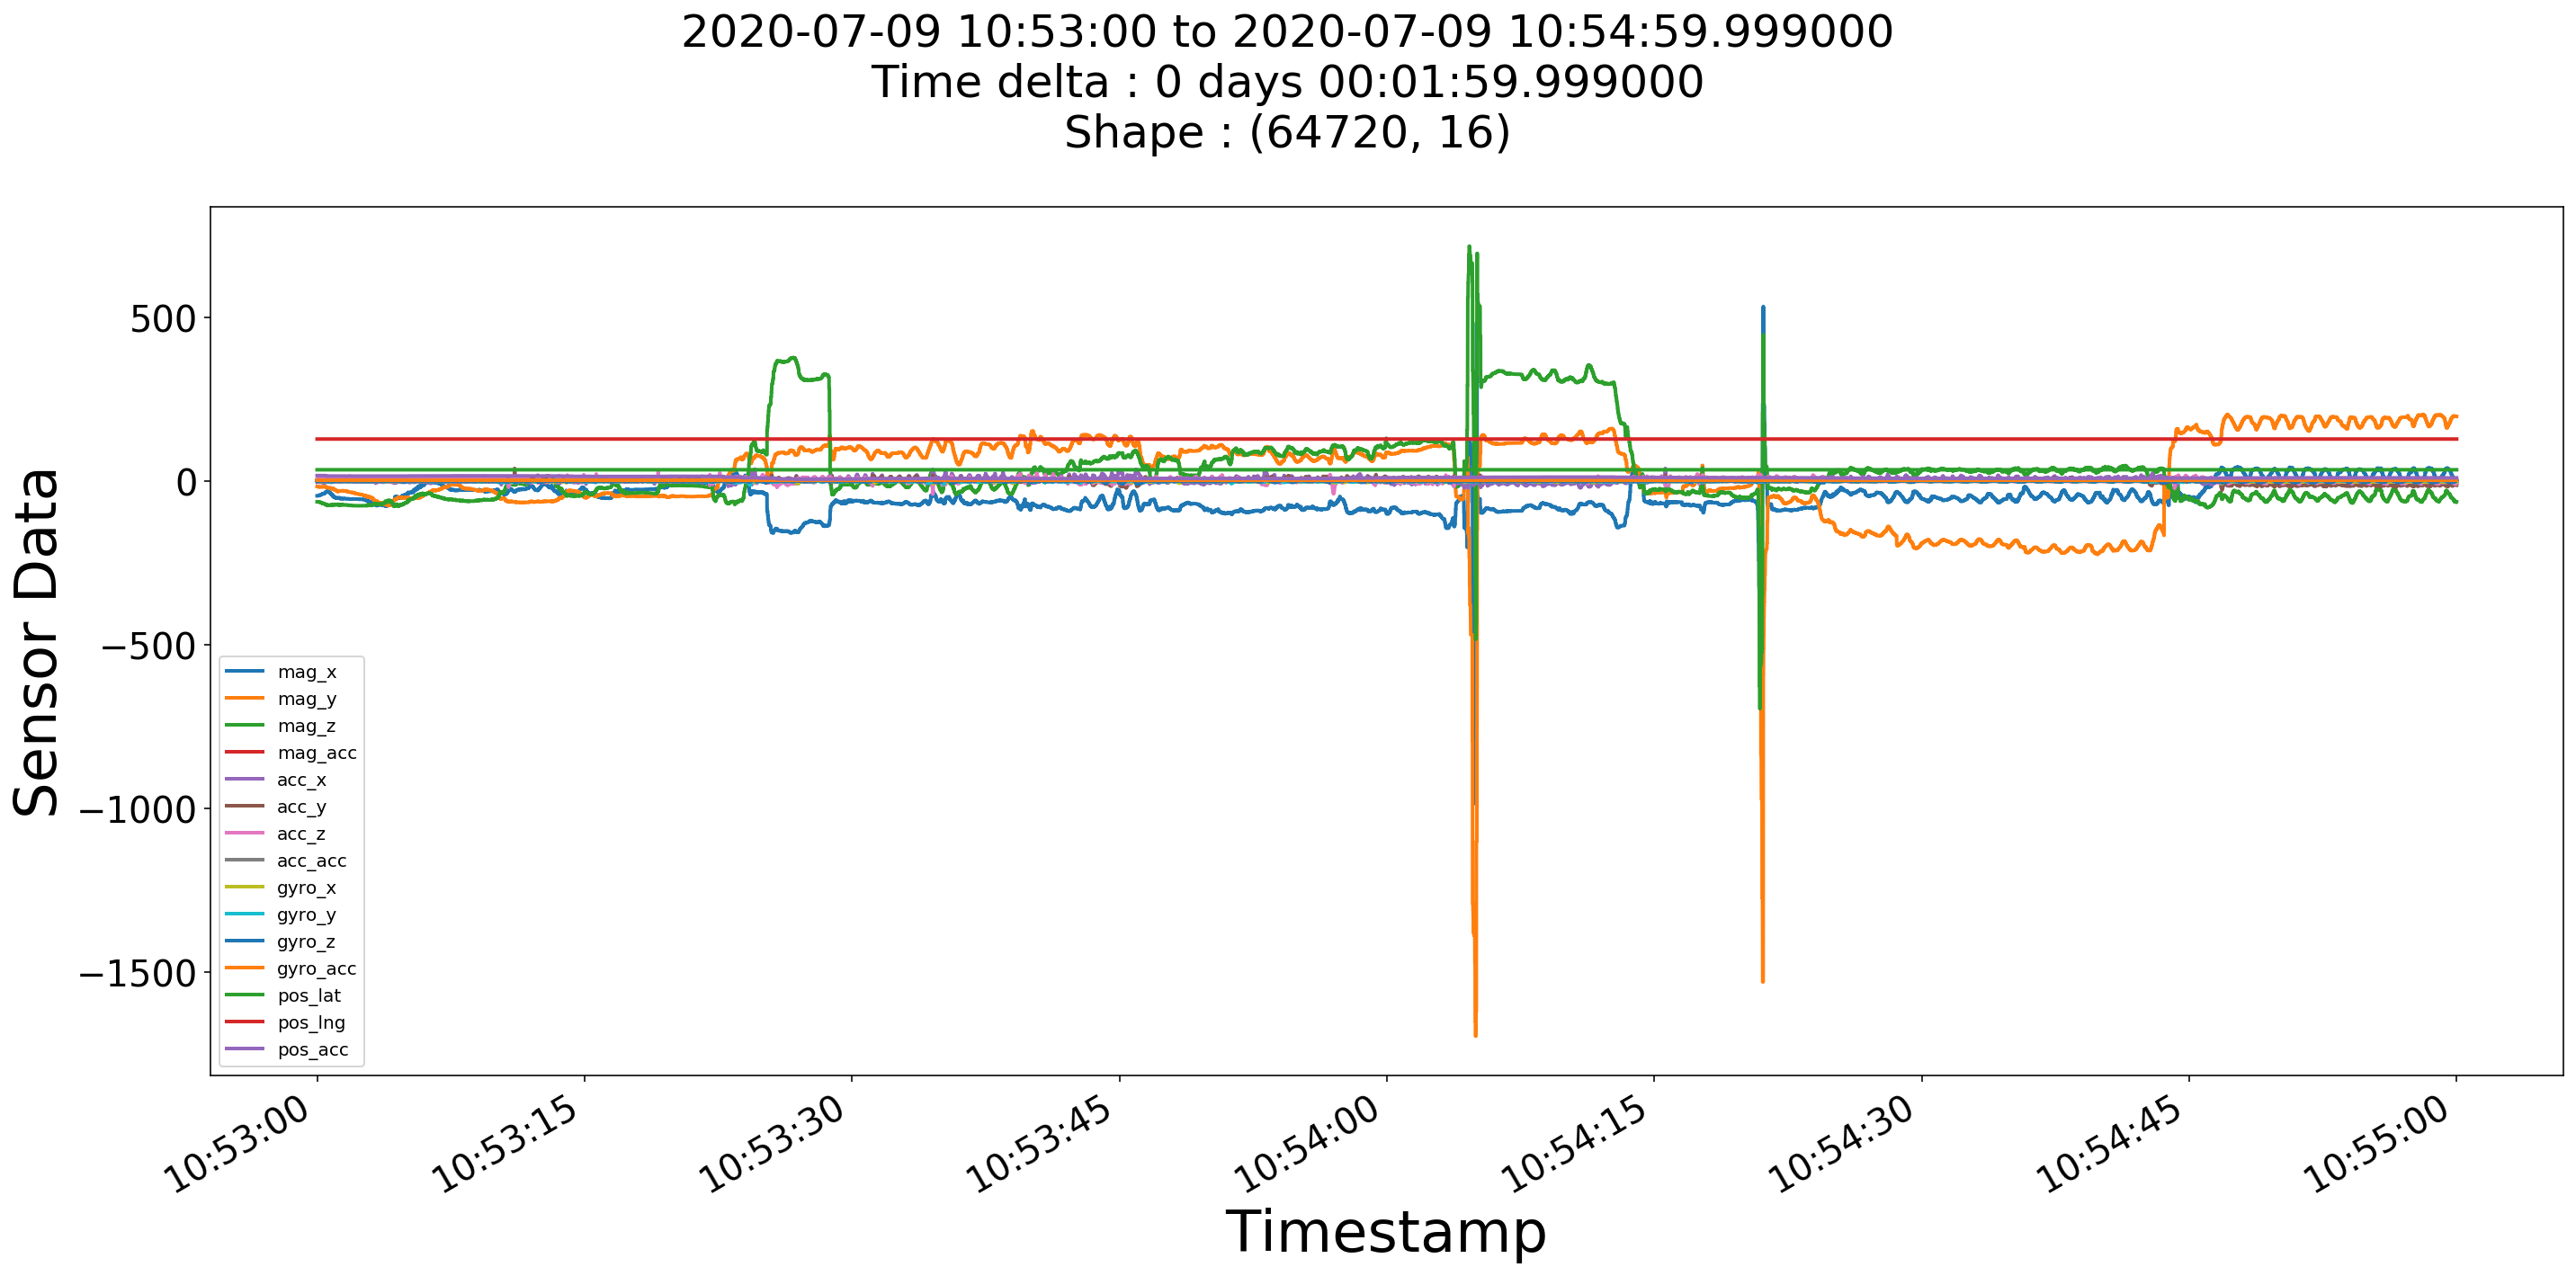

In [344]:
data_processing.plot_data(data_2["2020-07-09 10:53":"2020-07-09 10:54"], 
                          'Timestamp', 'Sensor Data', 'F4428F5EB41D', '20200709_195222_st1')

### Subplot

Start :
 2020-07-09 10:52:26.001000
End :
 2020-07-09 11:05:40.811000
Time delta :
 0 days 00:13:14.810000


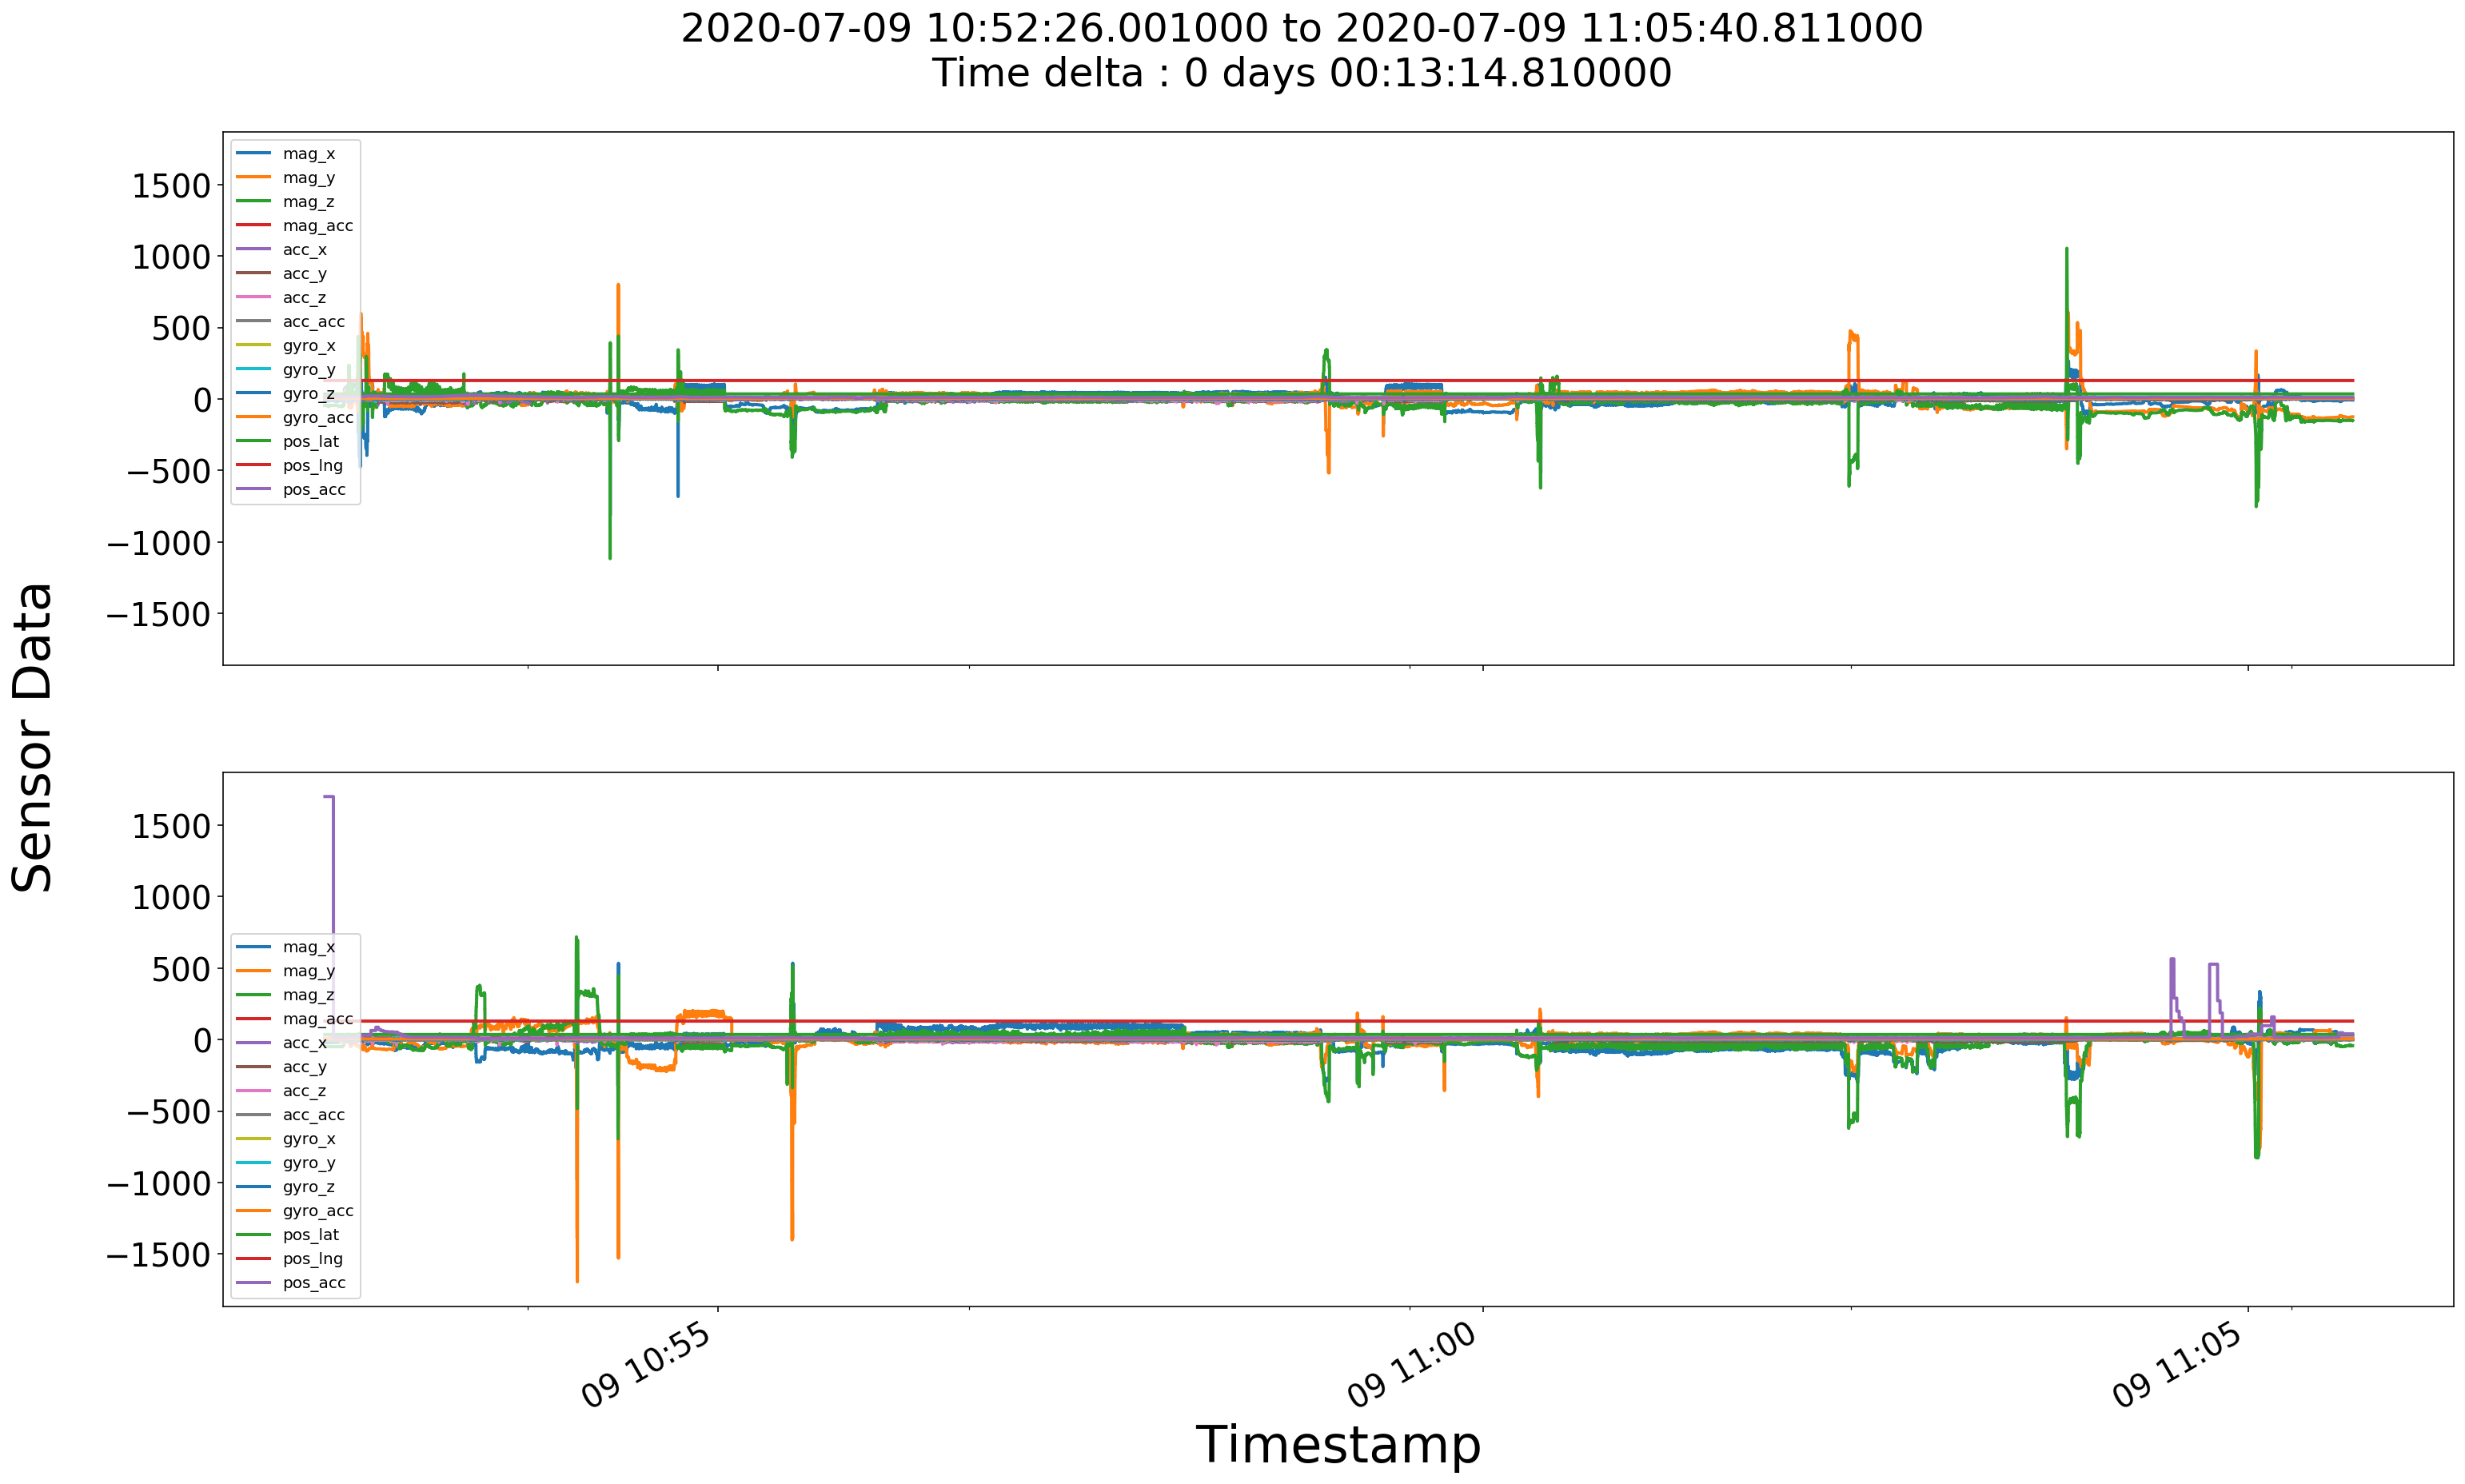

In [7]:
data_processing.plot_data_comp(data_1["2020-07-09 10:52:26":"2020-07-09 11:05:40"], 
                               data_2["2020-07-09 10:52:26":"2020-07-09 11:05:40"], 'Timestamp', 'Sensor Data', 
                               'E8508BDFF2AE-F4428F5EB41D', '20200709_195219-20200709_195222')

Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:53:30.999000
Time delta :
 0 days 00:00:30.997000


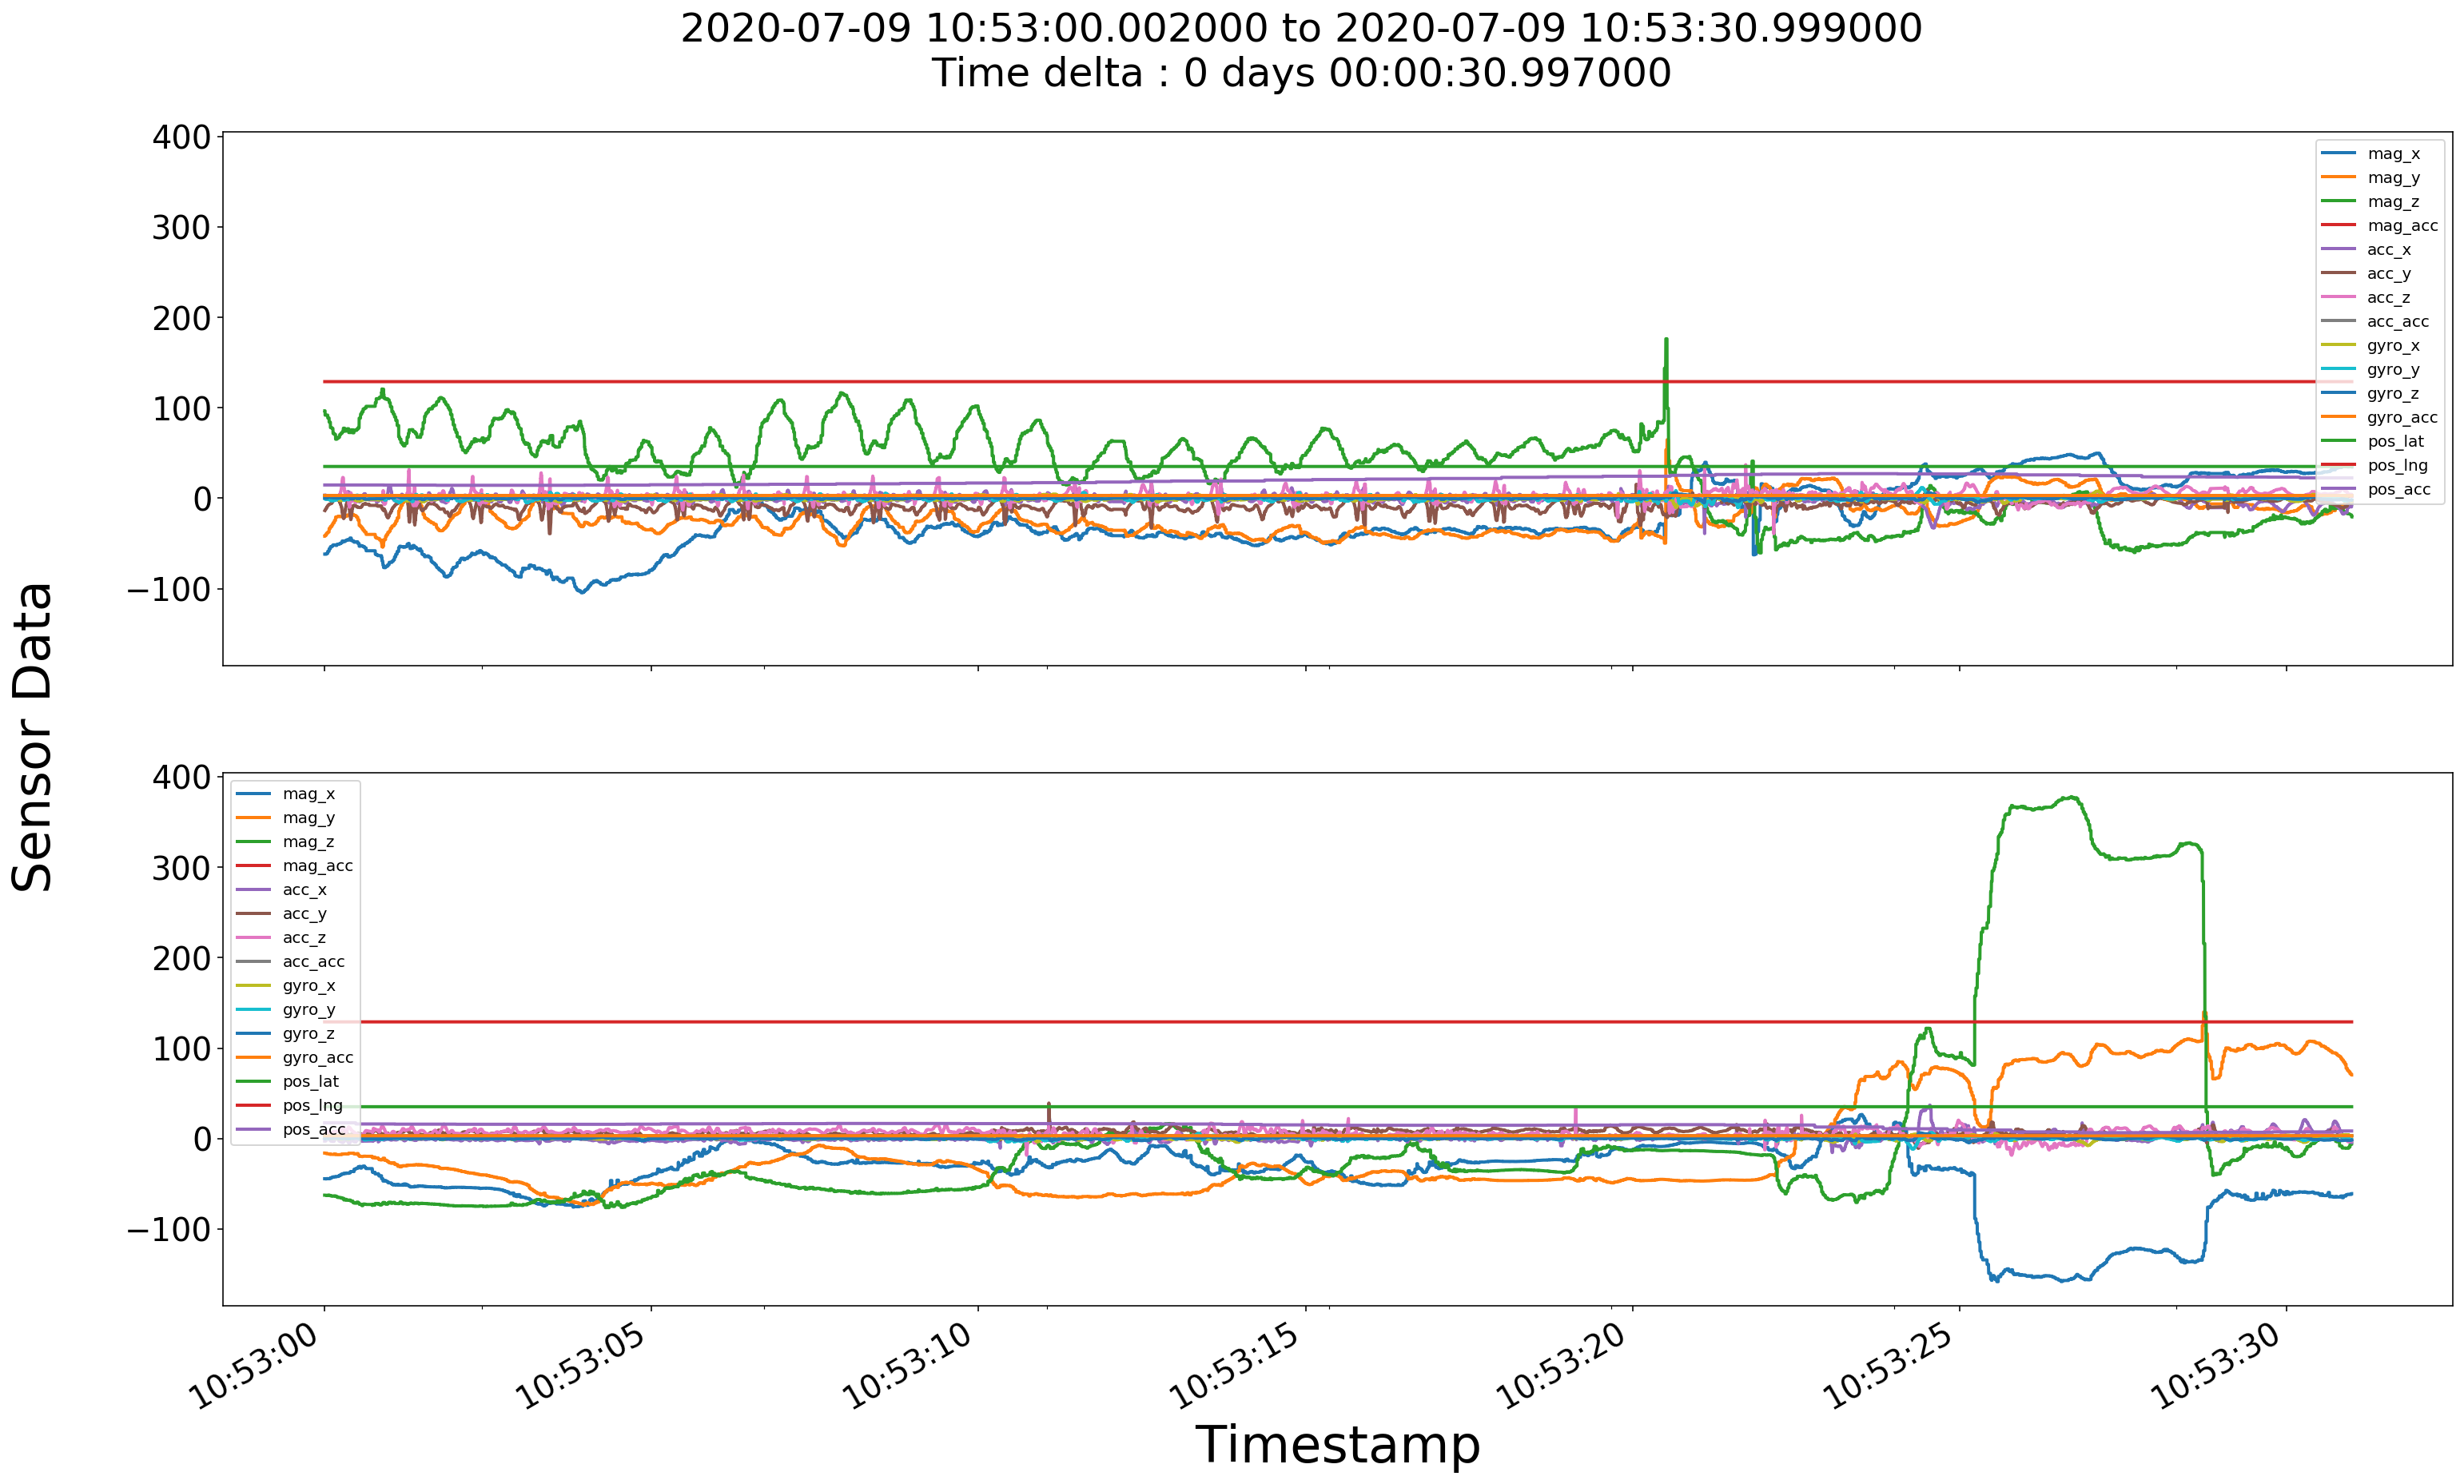

In [25]:
data_processing.plot_data_comp(data_1["2020-07-09 10:53:00":"2020-07-09 10:53:30"], 
                               data_2["2020-07-09 10:53:00":"2020-07-09 10:53:30"], 'Timestamp', 'Sensor Data', 
                               'E8508BDFF2AE-F4428F5EB41D', '20200709_195219-20200709_195222_st_1')

Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:53:30.999000
Time delta :
 0 days 00:00:30.997000


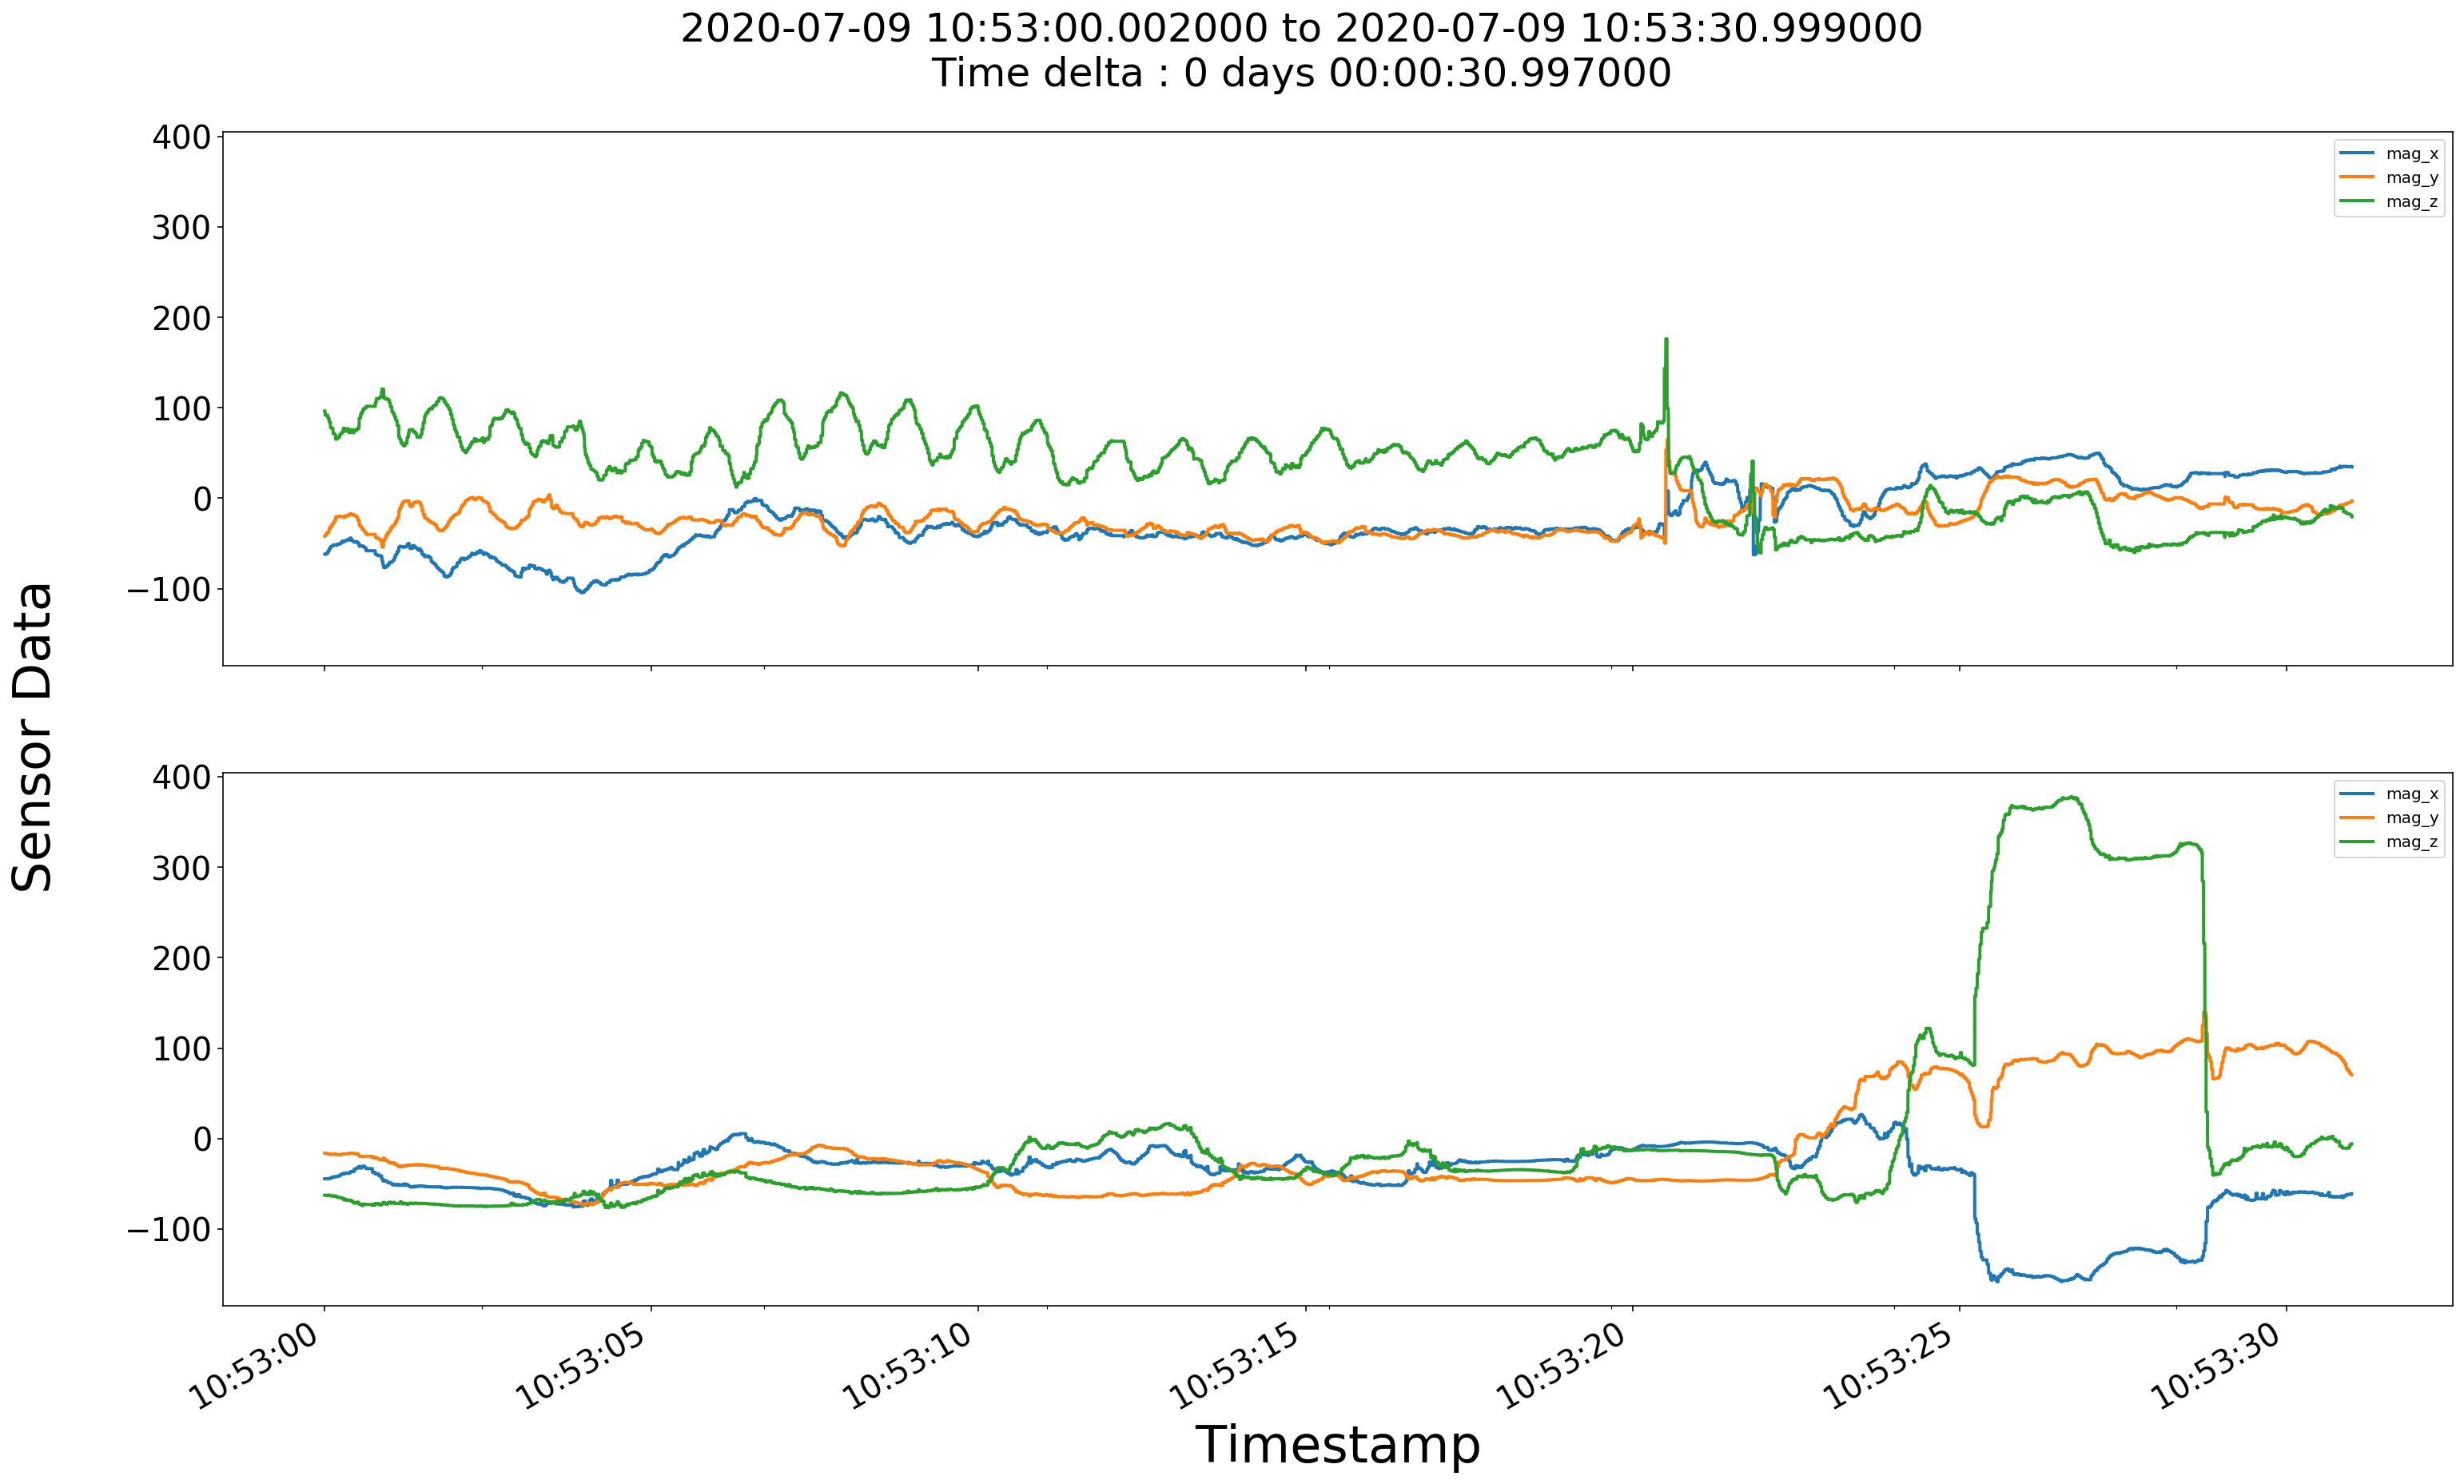

In [26]:
data_processing.plot_data_comp(data_1["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_x','mag_y','mag_z']], 
                               data_2["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_x','mag_y','mag_z']], 'Timestamp', 'Sensor Data', 
                               'E8508BDFF2AE-F4428F5EB41D', '20200709_195219-20200709_195222_st_2')

Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:53:30.999000
Time delta :
 0 days 00:00:30.997000


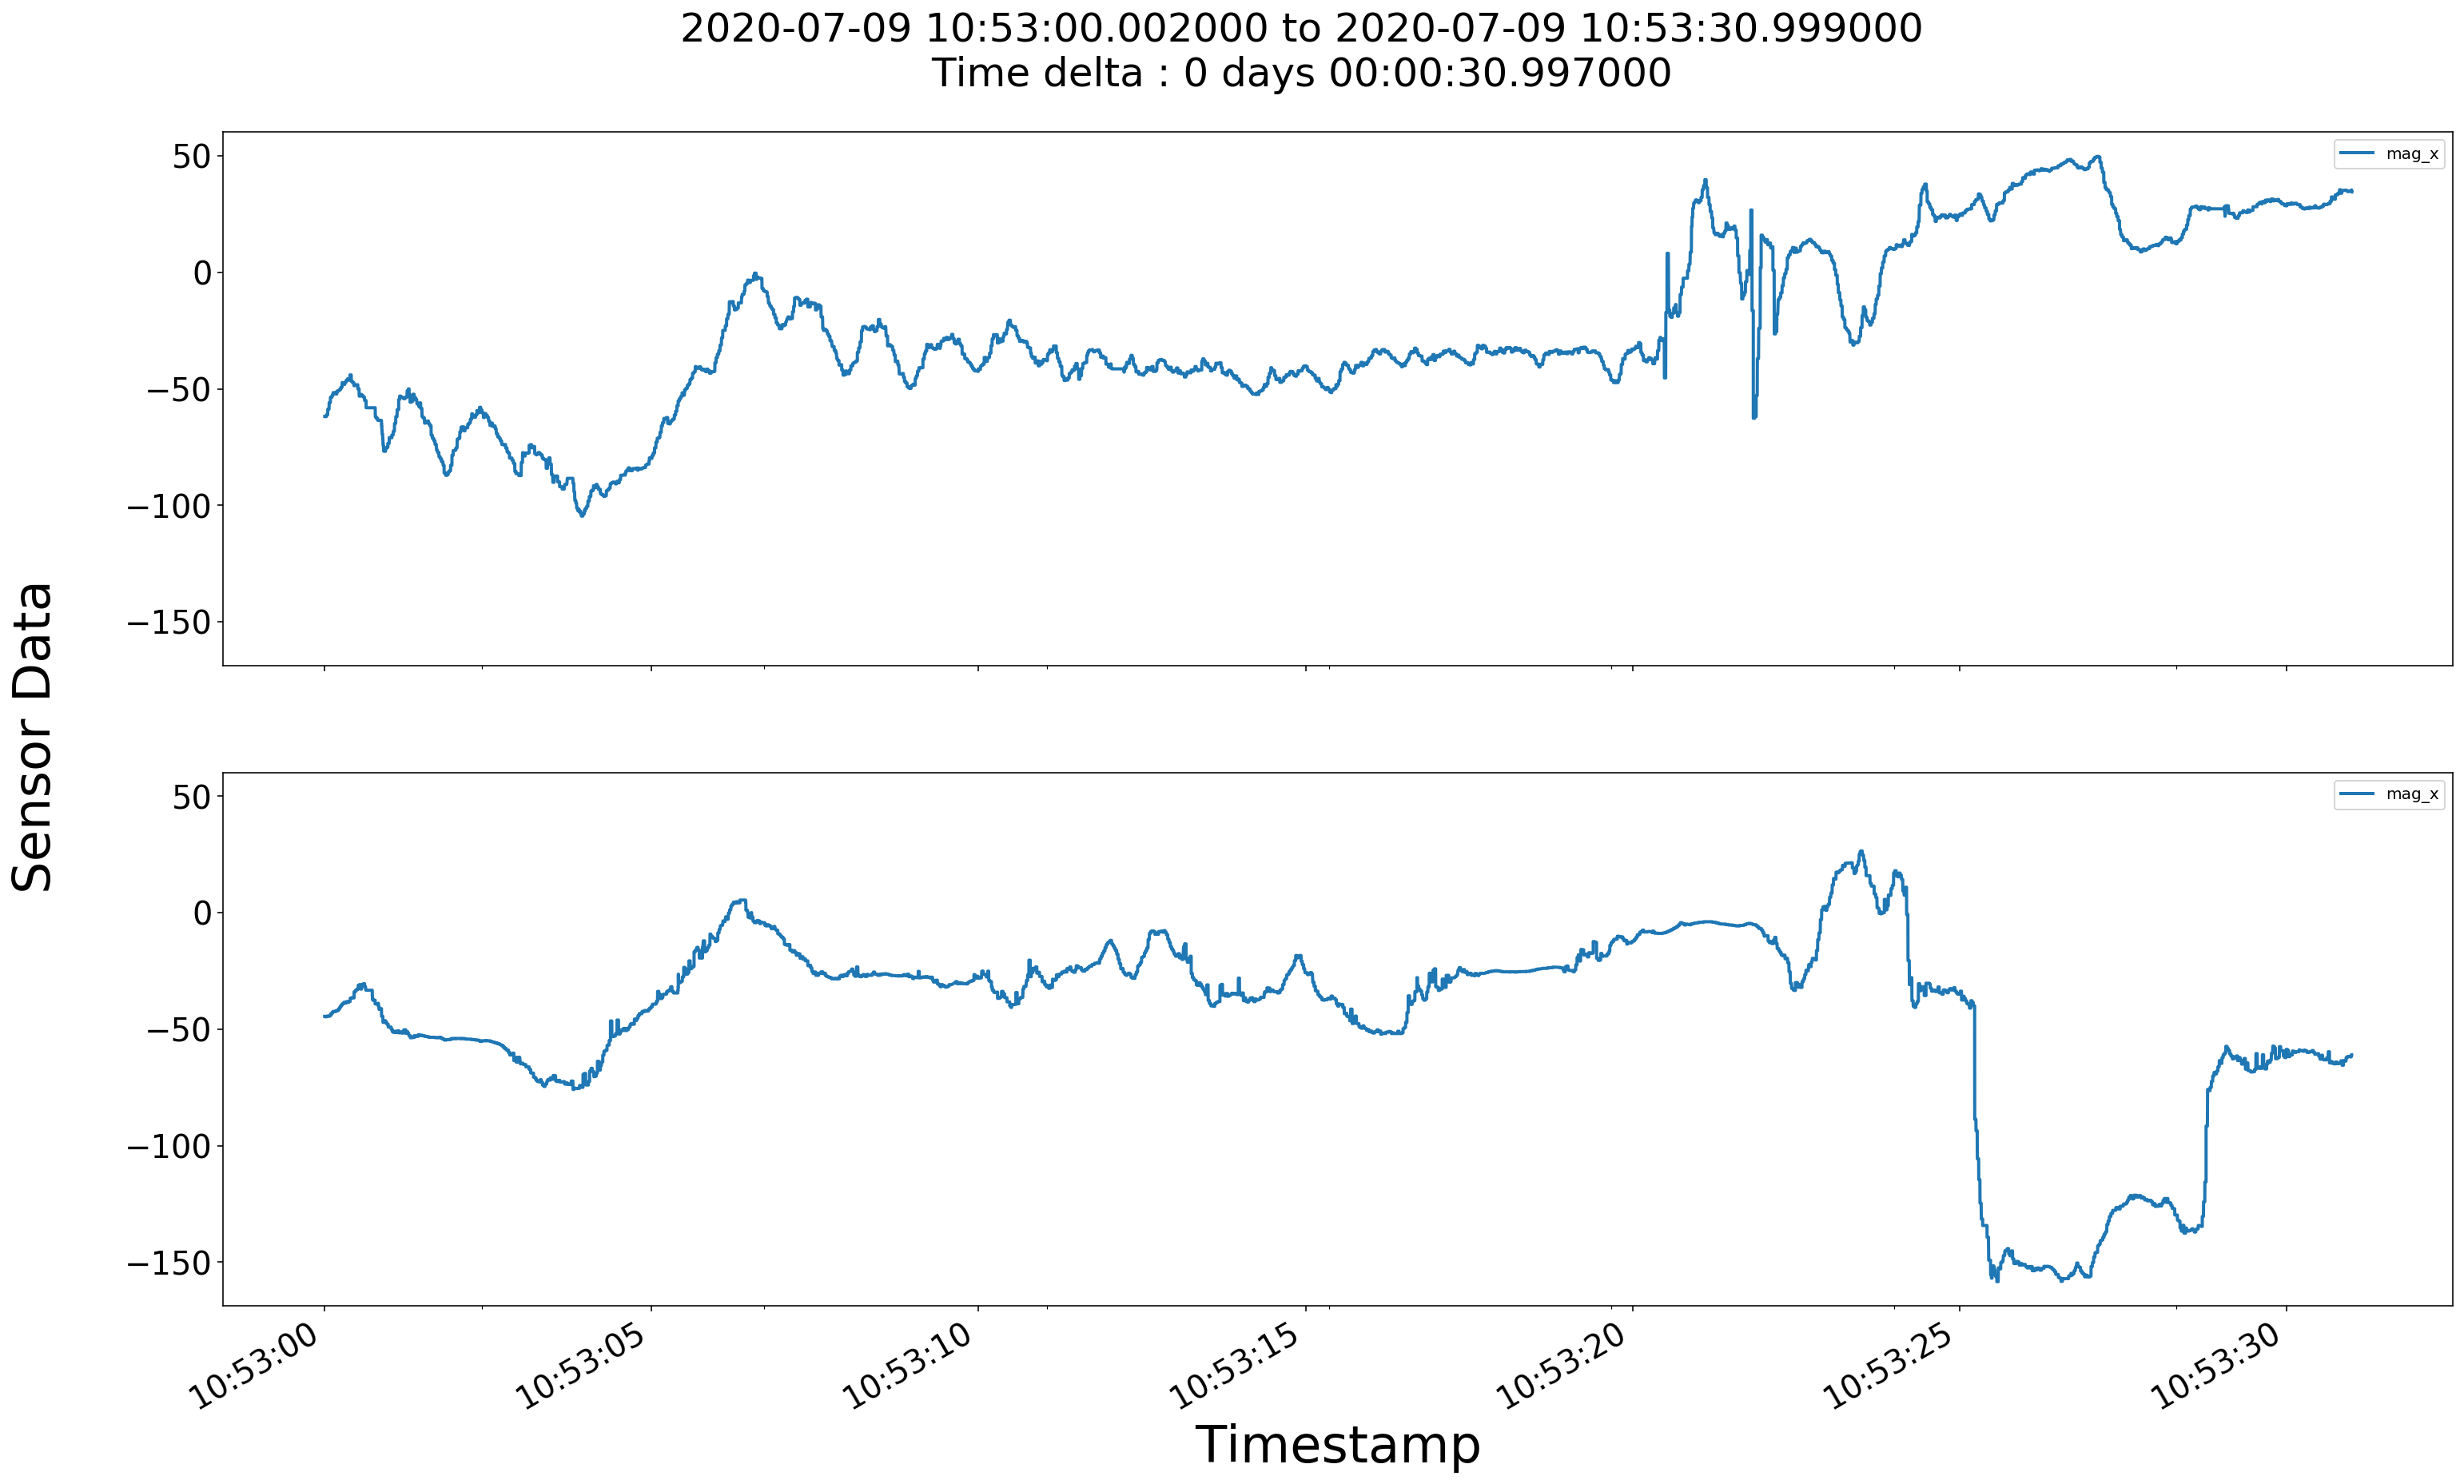

In [27]:
data_processing.plot_data_comp(data_1["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_x']], 
                               data_2["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_x']], 'Timestamp', 'Sensor Data', 
                               'E8508BDFF2AE-F4428F5EB41D', '20200709_195219-20200709_195222_st_3x')

Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:53:30.999000
Time delta :
 0 days 00:00:30.997000


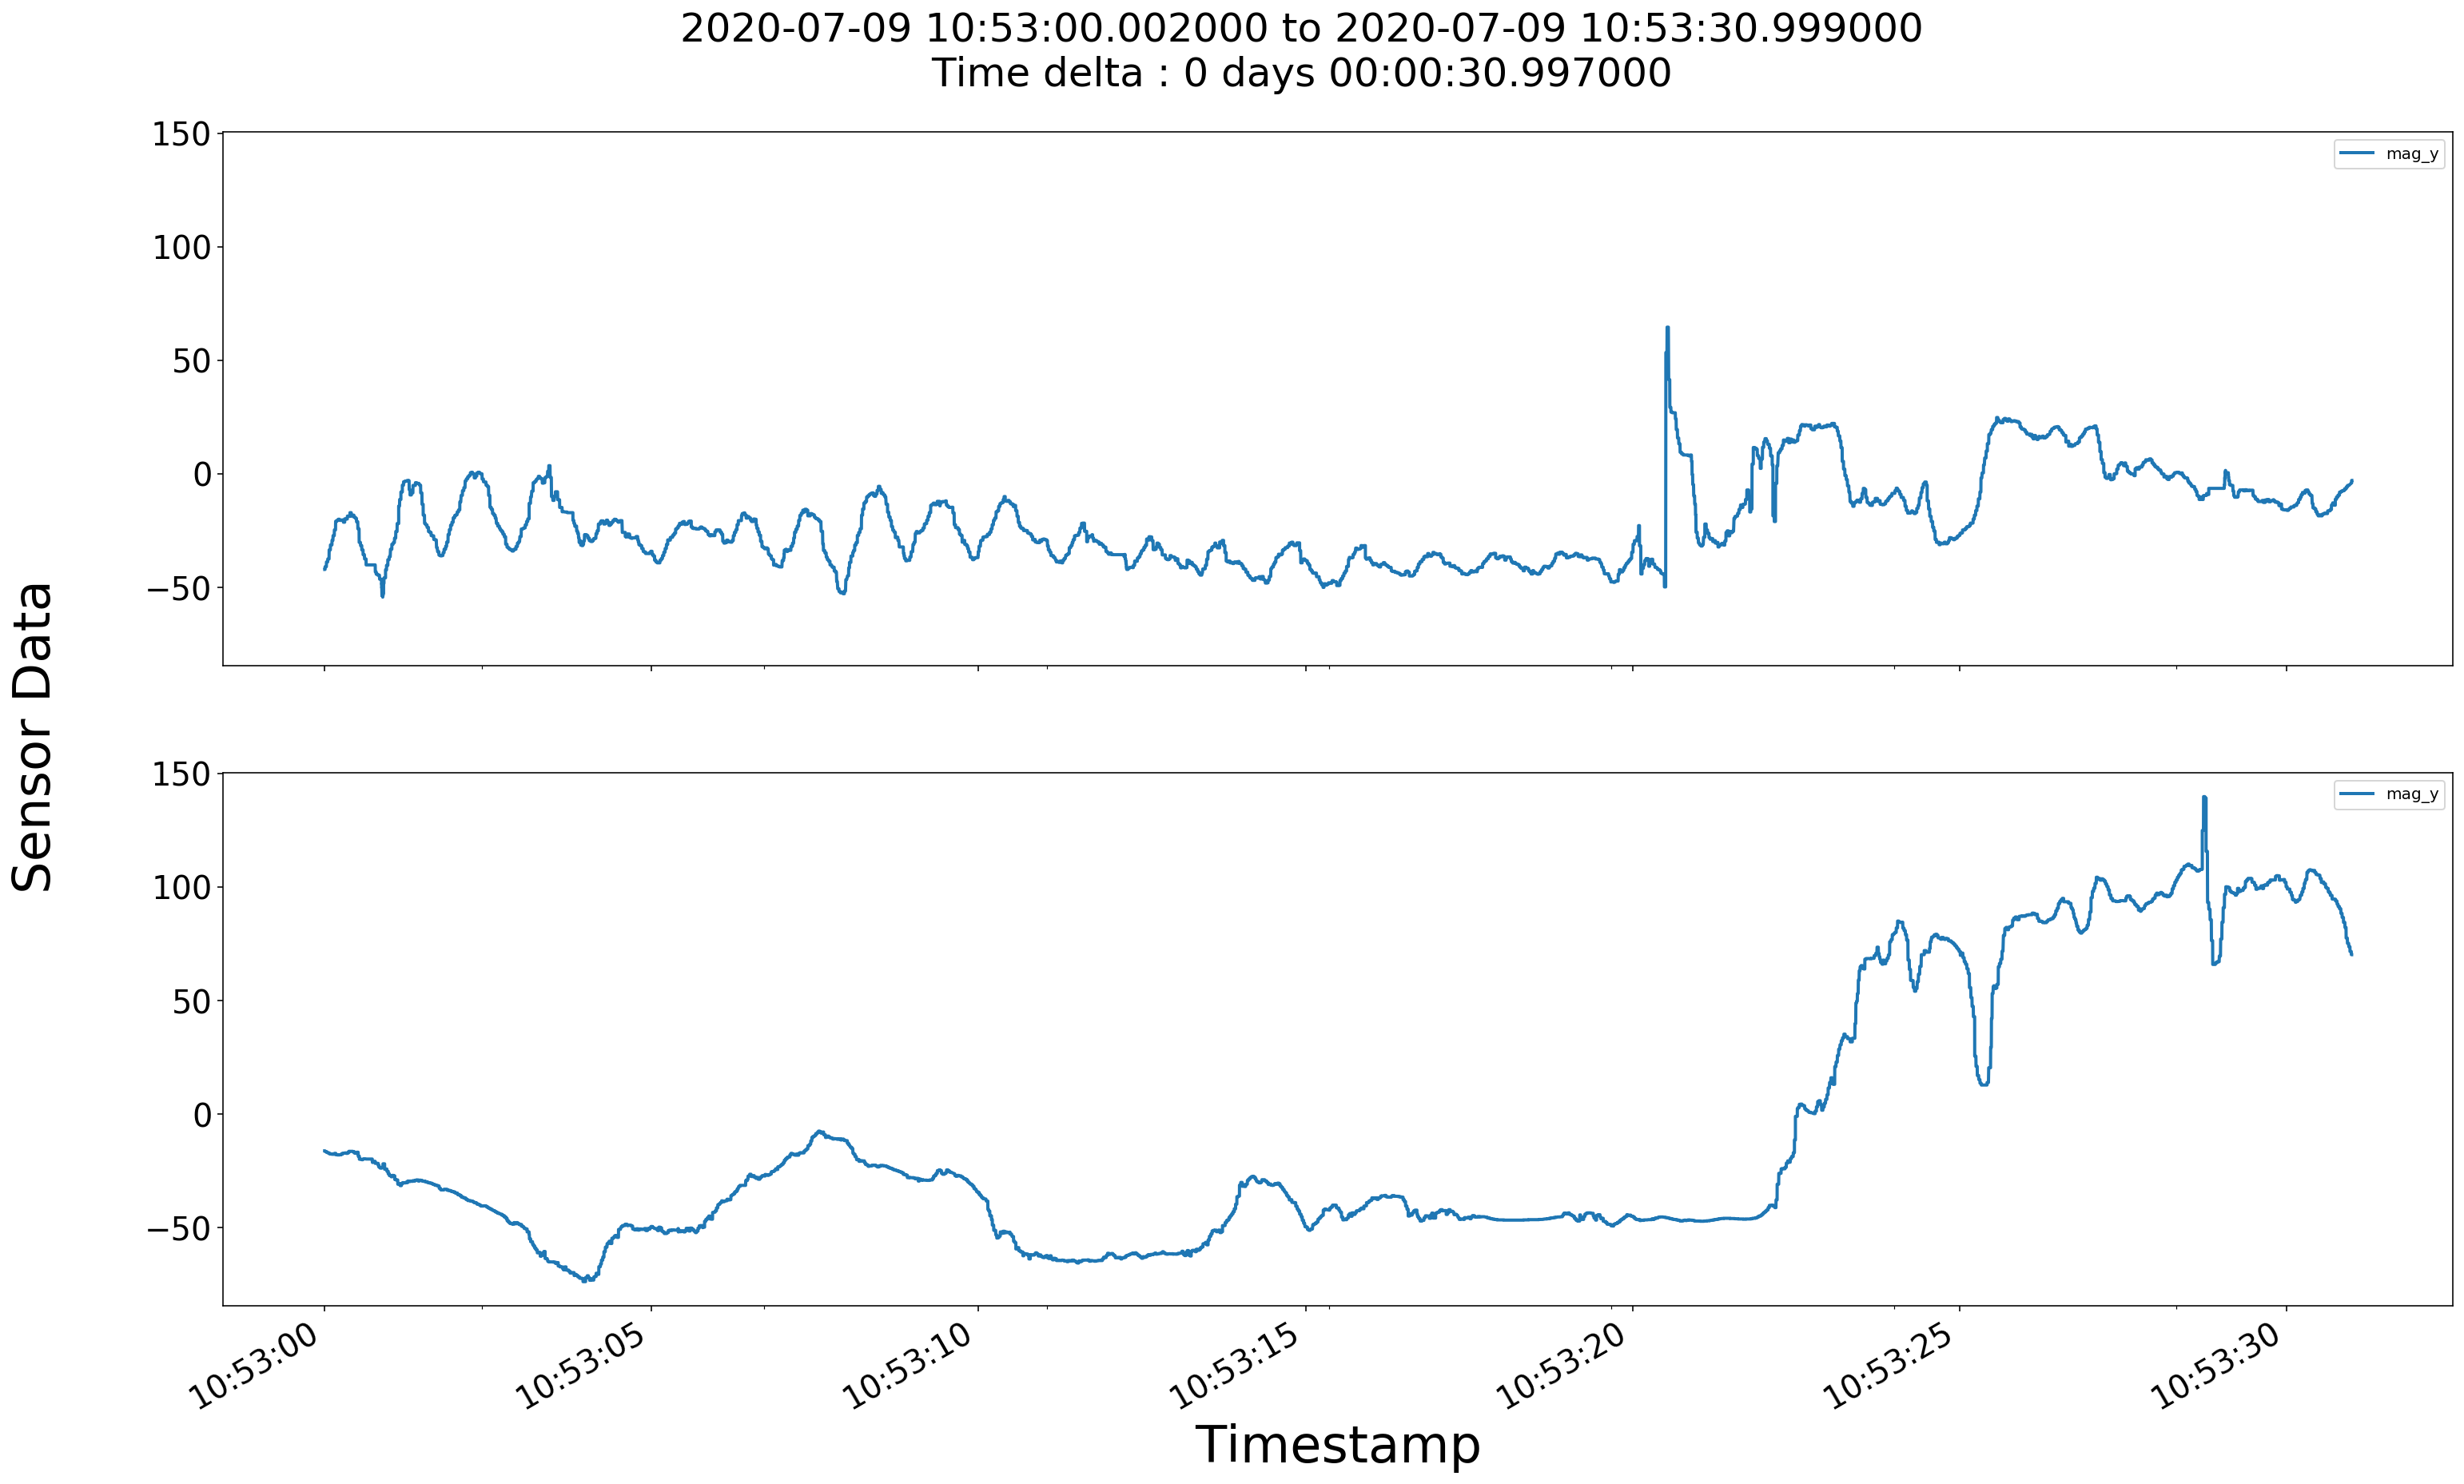

In [28]:
data_processing.plot_data_comp(data_1["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_y']], 
                               data_2["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_y']], 'Timestamp', 'Sensor Data', 
                               'E8508BDFF2AE-F4428F5EB41D', '20200709_195219-20200709_195222_st_3y')

Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:53:30.999000
Time delta :
 0 days 00:00:30.997000


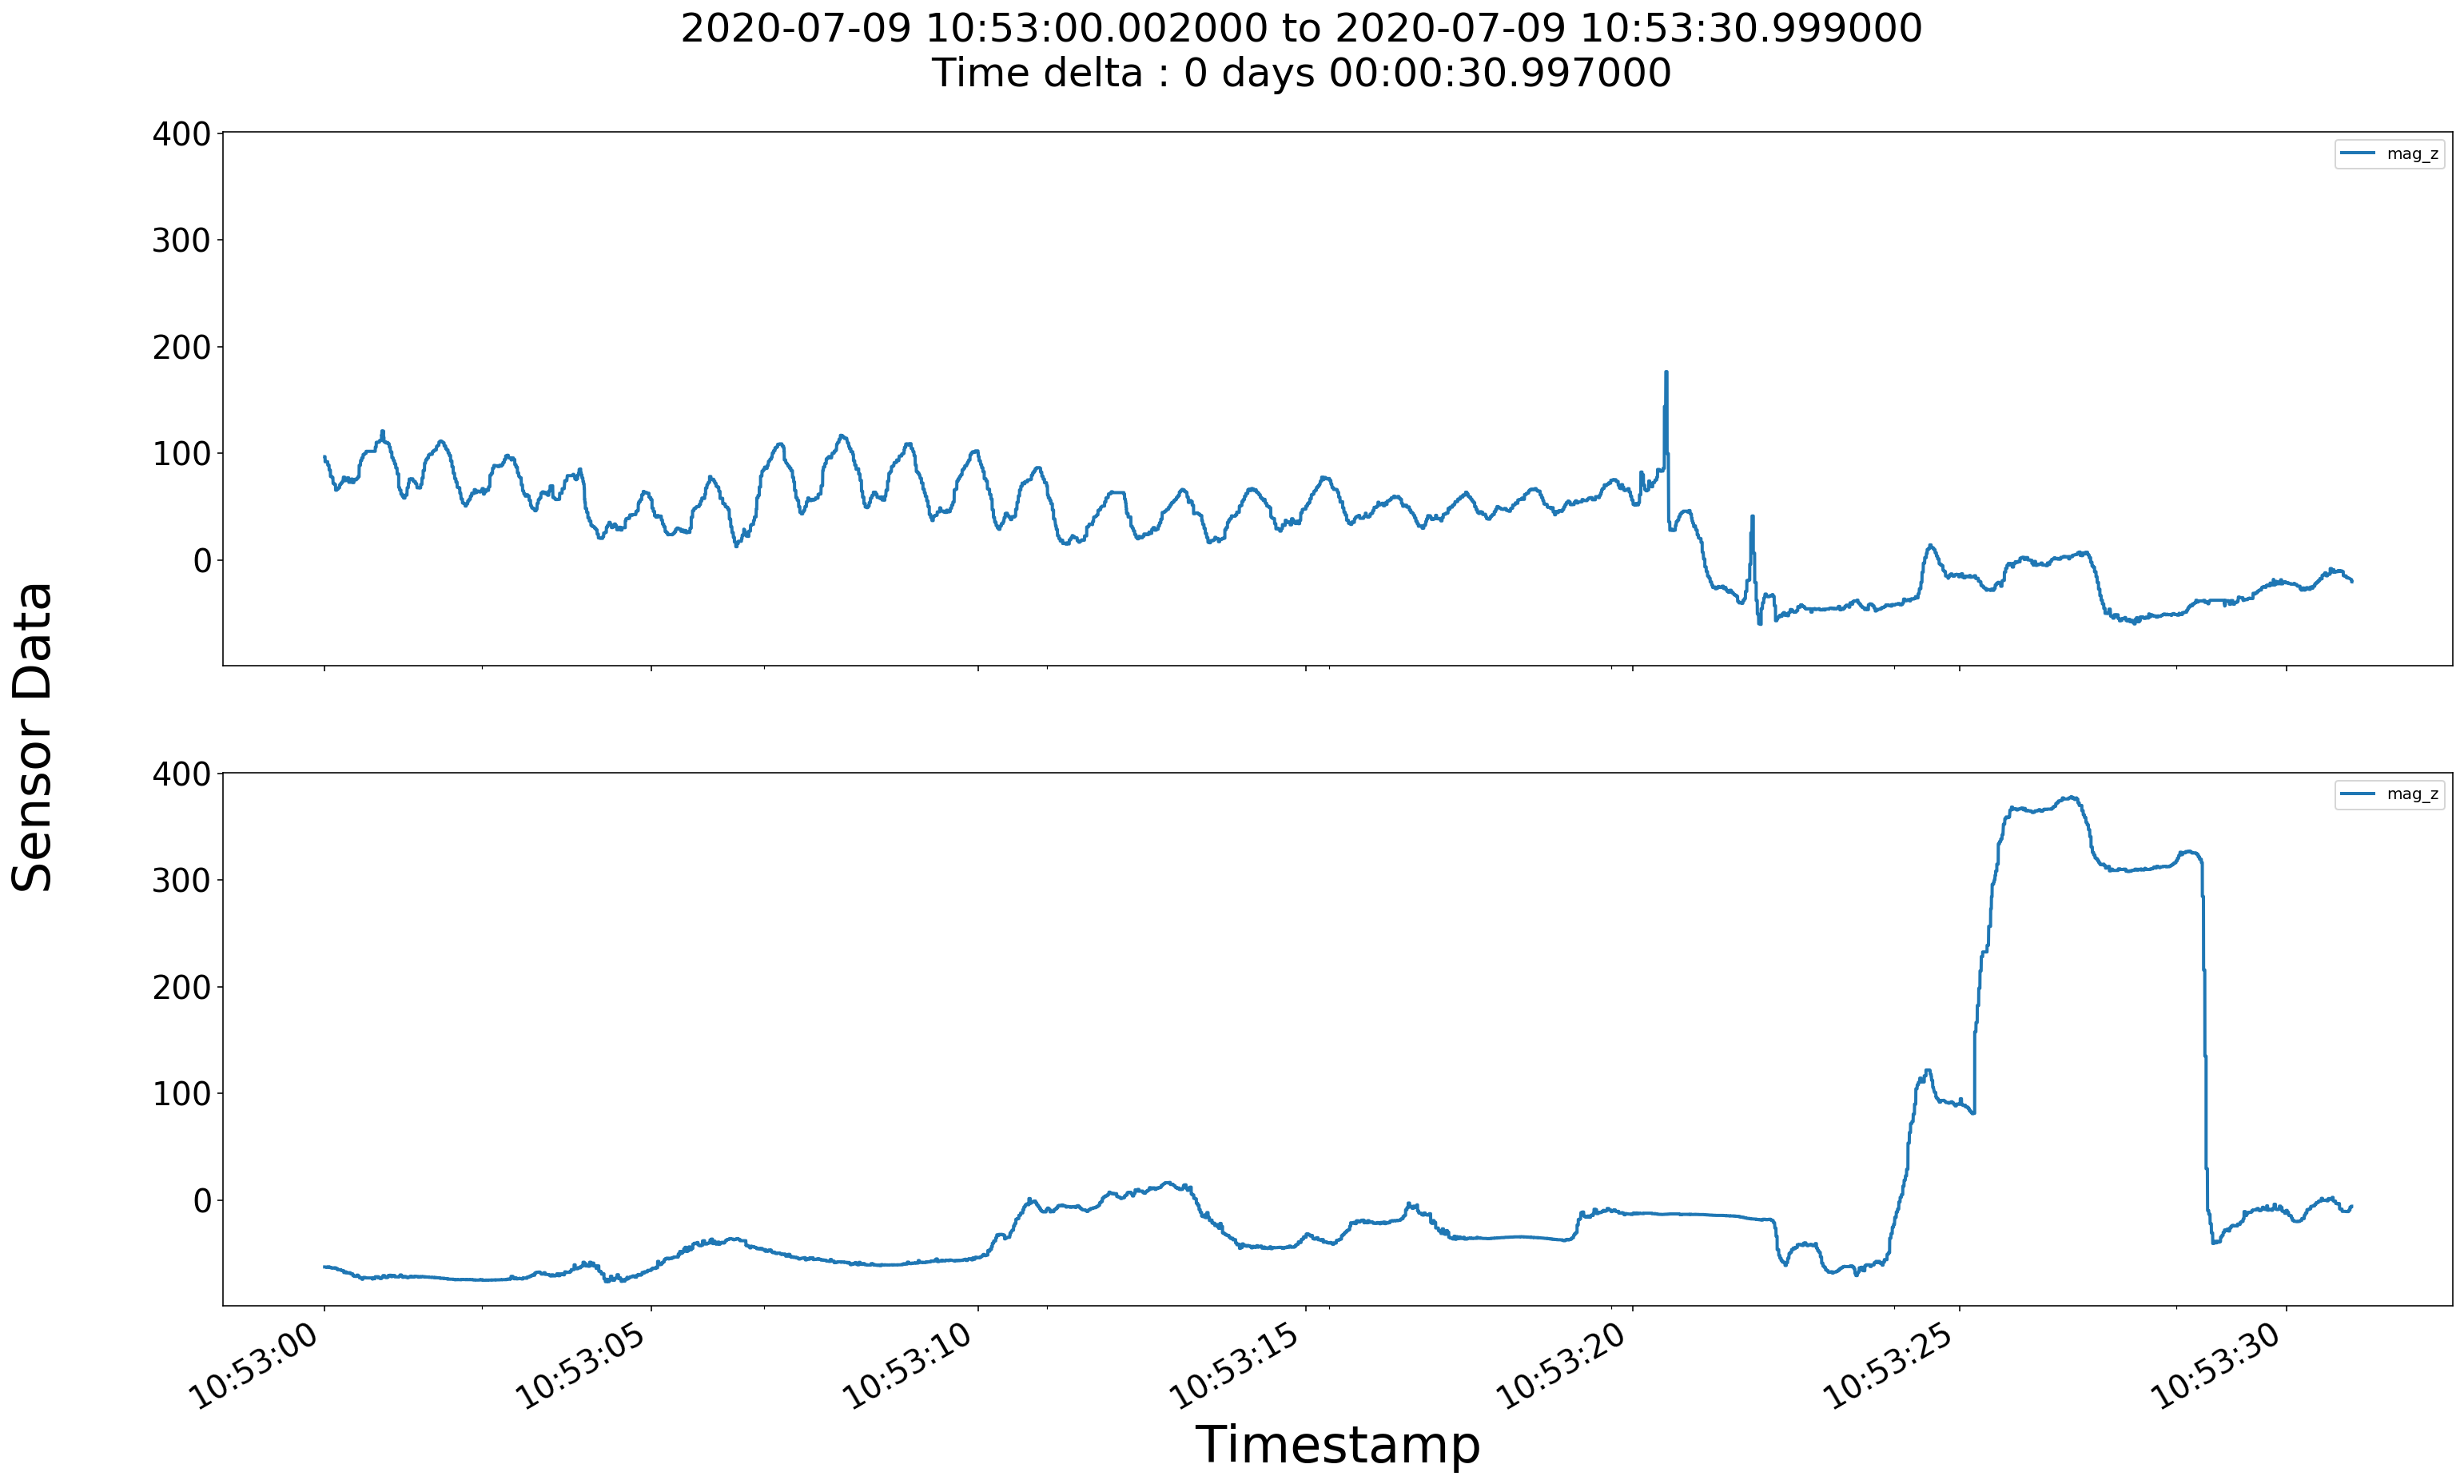

In [29]:
data_processing.plot_data_comp(data_1["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_z']], 
                               data_2["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_z']], 'Timestamp', 'Sensor Data', 
                               'E8508BDFF2AE-F4428F5EB41D', '20200709_195219-20200709_195222_st_3z')

# Downsampling

In [34]:
data_1_ds = data_1.resample('1S').mean()
data_1_ds.head()

mag_x      mag_y      mag_z  mag_acc     acc_x  \
timestamp                                                                 
2020-07-09 10:52:20 -10.108065  19.415323 -46.144355      3.0  0.655558   
2020-07-09 10:52:21  -9.578843  19.025136 -45.336710      3.0  0.776646   
2020-07-09 10:52:22  -9.934381  19.216267 -44.876711      3.0  0.887603   
2020-07-09 10:52:23 -12.140180  20.123964 -44.606847      3.0  1.195403   
2020-07-09 10:52:24 -13.066789  19.623723 -44.531752      3.0  1.115148   

                        acc_y     acc_z  acc_acc    gyro_x    gyro_y  \
timestamp                                                              
2020-07-09 10:52:20  3.473321  9.258610      3.0  0.023212  0.028393   
2020-07-09 10:52:21  3.454342  9.151037      3.0  0.001495 -0.007222   
2020-07-09 10:52:22  3.382038  9.177059      3.0 -0.014994 -0.014931   
2020-07-09 10:52:23  3.143451  9.224139      3.0 -0.010574 -0.033778   
2020-07-09 10:52:24  3.319025  9.180479      3.0 -0.001812 -0.000017   

                       gyro_z  gyro_acc    pos_lat     pos_lng  pos_acc  
timestamp                                                                
2020-07-09 10:52:20  0.009716       3.0  35.145675  129.007296   12.965  
2020-07-09 10:52:21 -0.003920       3.0  35.145675  129.007296   12.965  
2020-07-09 10:52:22 -0.026689       3.0  35.145675  129.007296   12.965  
2020-07-09 10:52:23 -0.021388       3.0  35.145675  129.007296   12.965  
2020-07-09 10:52:24  0.010421       3.0  35.145675  129.007296   12.965

In [35]:
data_2_ds = data_2.resample('1S').mean()
data_2_ds.head()

mag_x     mag_y      mag_z  mag_acc     acc_x  \
timestamp                                                                
2020-07-09 10:52:26 -22.836418 -3.199016 -50.579332      3.0 -0.343716   
2020-07-09 10:52:27 -22.307050 -3.217625 -50.403711      3.0 -0.329367   
2020-07-09 10:52:28 -21.586008 -3.124067 -50.180784      3.0 -0.423883   
2020-07-09 10:52:29 -20.587782 -3.013534 -49.864286      3.0 -0.246625   
2020-07-09 10:52:30 -20.293809 -3.101126 -49.769794      3.0 -0.019443   

                        acc_y     acc_z  acc_acc    gyro_x    gyro_y  \
timestamp                                                              
2020-07-09 10:52:26  4.828509  8.630265      3.0  0.006534 -0.002852   
2020-07-09 10:52:27  4.740084  8.708293      3.0 -0.038691  0.027857   
2020-07-09 10:52:28  4.566355  8.769793      3.0  0.014739 -0.005577   
2020-07-09 10:52:29  4.597875  8.801394      3.0  0.026487 -0.057004   
2020-07-09 10:52:30  4.958378  8.582312      3.0  0.044933  0.057362   

                       gyro_z  gyro_acc    pos_lat     pos_lng      pos_acc  
timestamp                                                                    
2020-07-09 10:52:26 -0.000310       3.0  35.148030  129.006742  1700.000000  
2020-07-09 10:52:27  0.021183       3.0  35.148030  129.006742  1700.000000  
2020-07-09 10:52:28 -0.009834       3.0  35.148030  129.006742  1700.000000  
2020-07-09 10:52:29 -0.003236       3.0  35.146594  129.007081   669.435385  
2020-07-09 10:52:30  0.017412       3.0  35.145680  129.007298    13.045000

## Plotting data

### Subplot

Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:53:30
Time delta :
 0 days 00:00:30


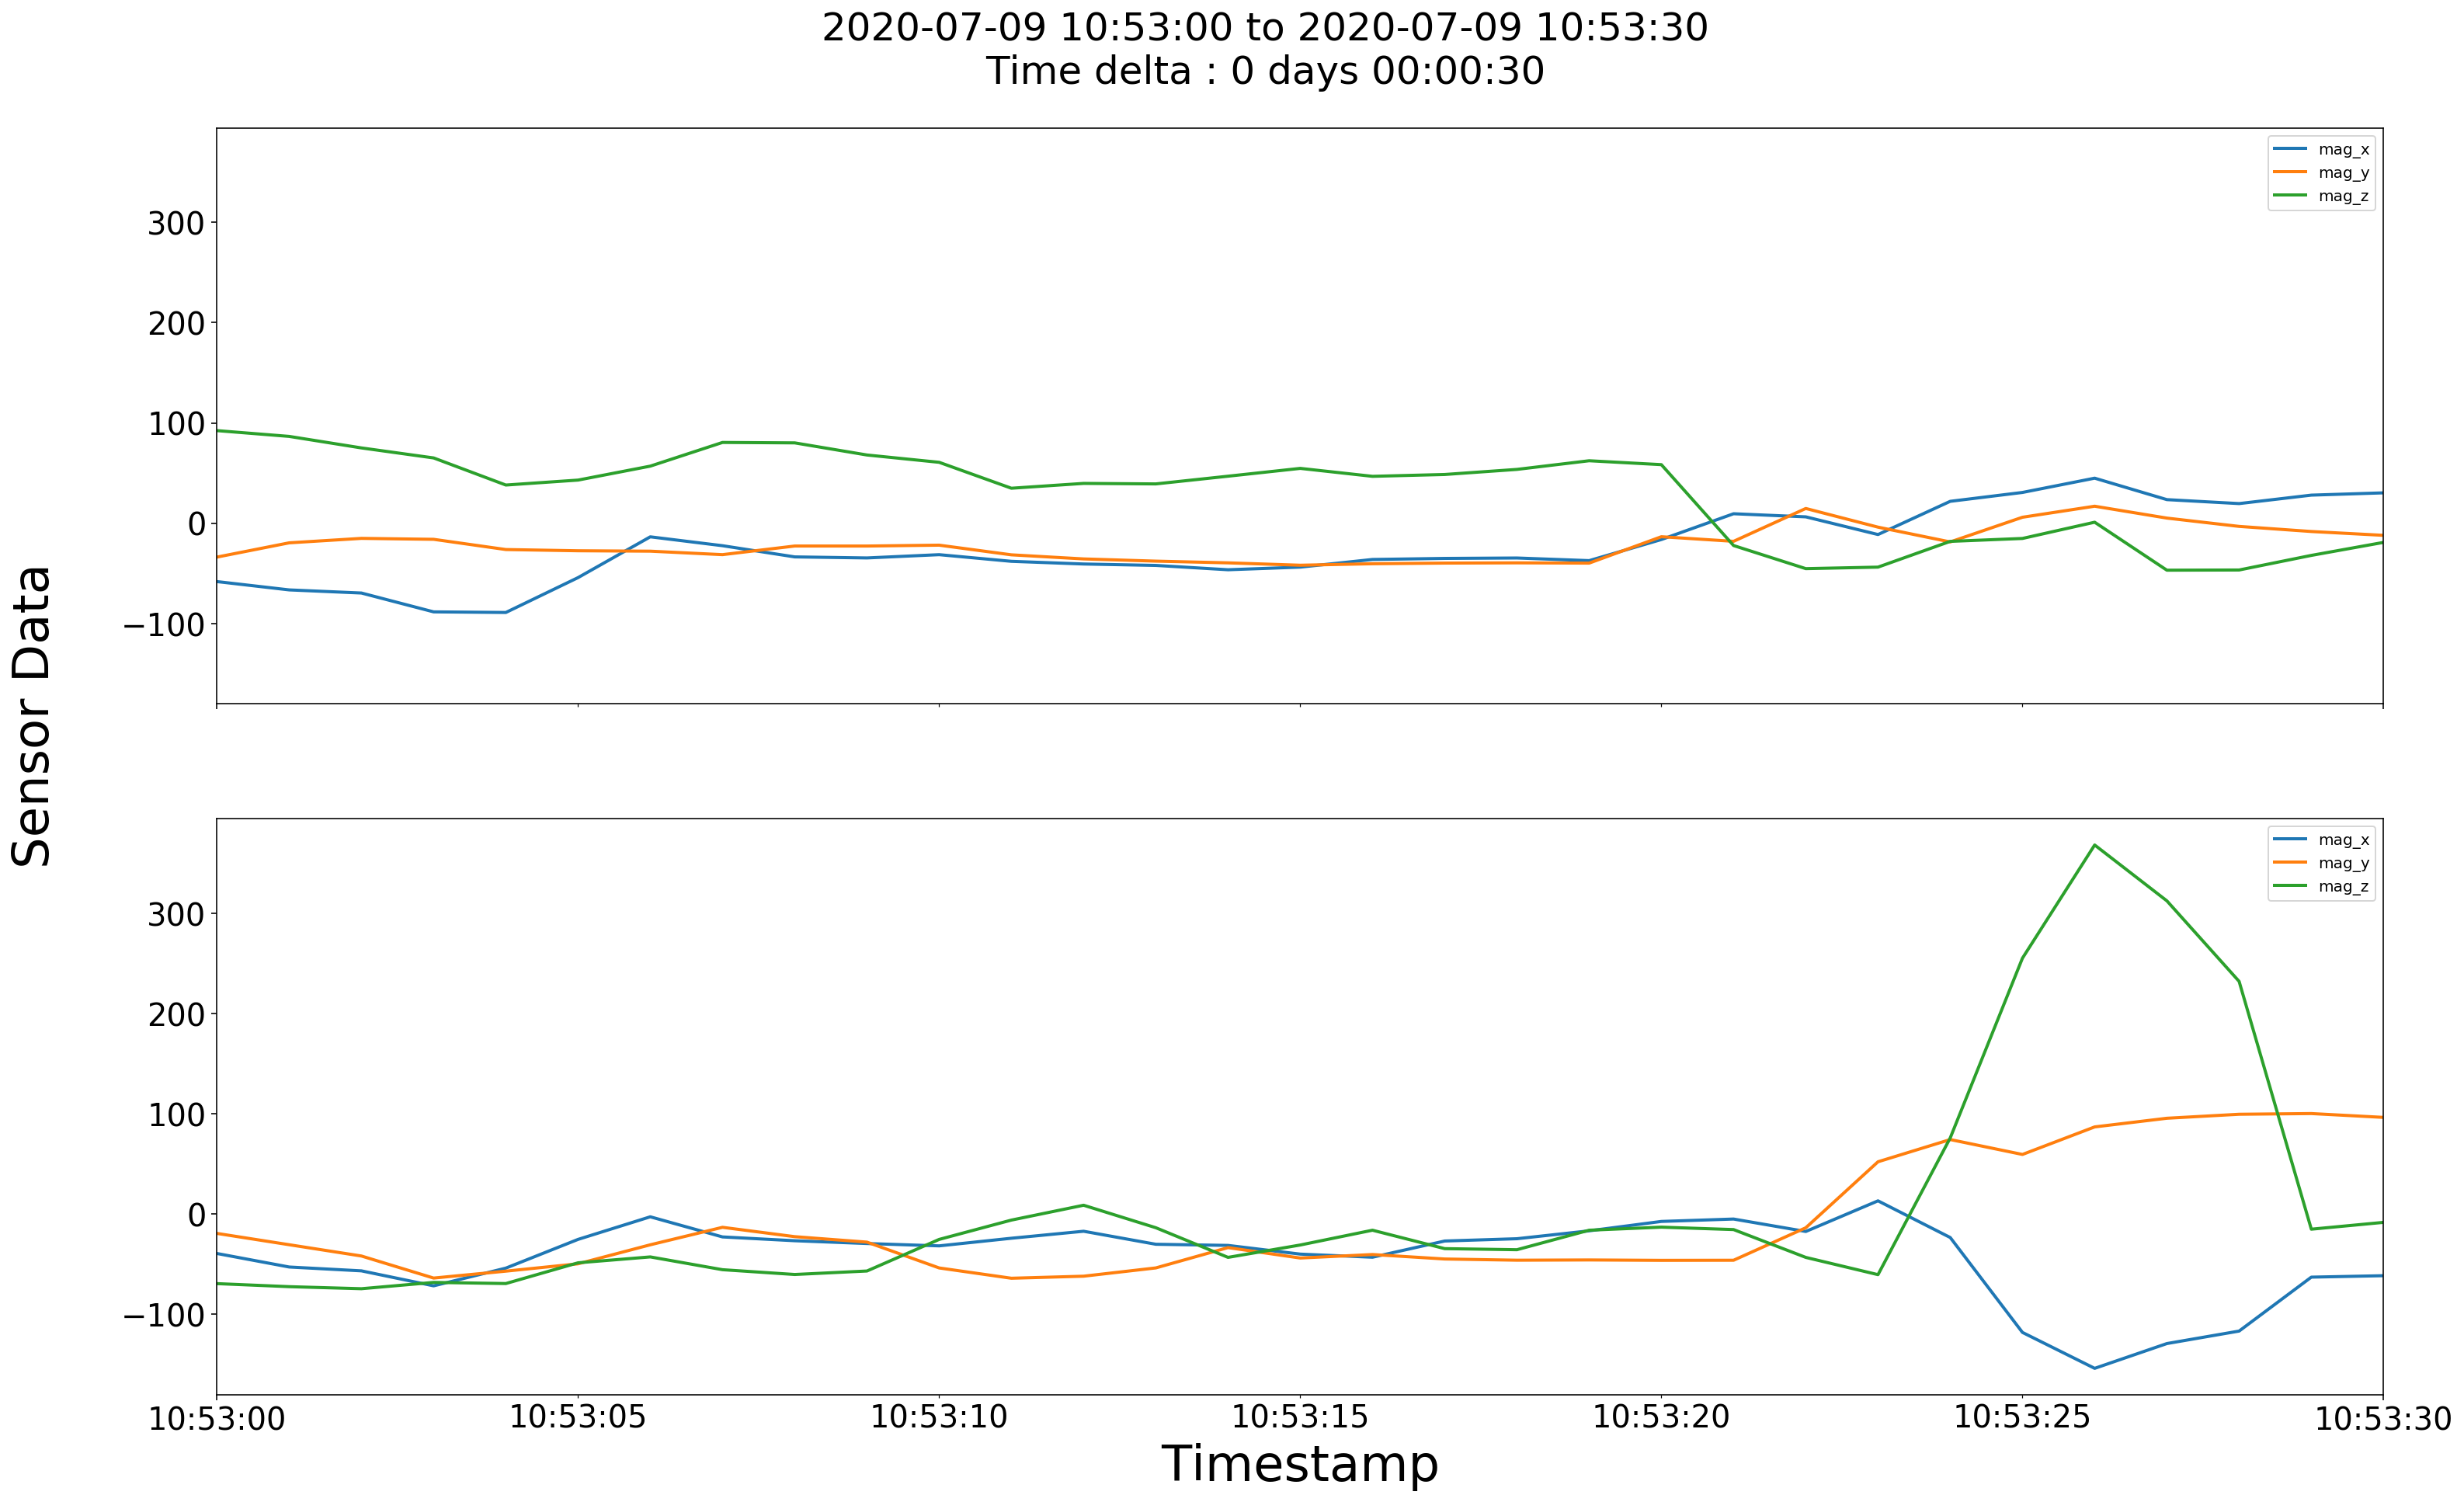

In [36]:
data_processing.plot_data_comp(data_1_ds["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_x','mag_y','mag_z']], 
                               data_2_ds["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_x','mag_y','mag_z']], 'Timestamp', 'Sensor Data', 
                               'E8508BDFF2AE-F4428F5EB41D', '20200709_195219-20200709_195222_st_4(ds)')

Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:53:30
Time delta :
 0 days 00:00:30


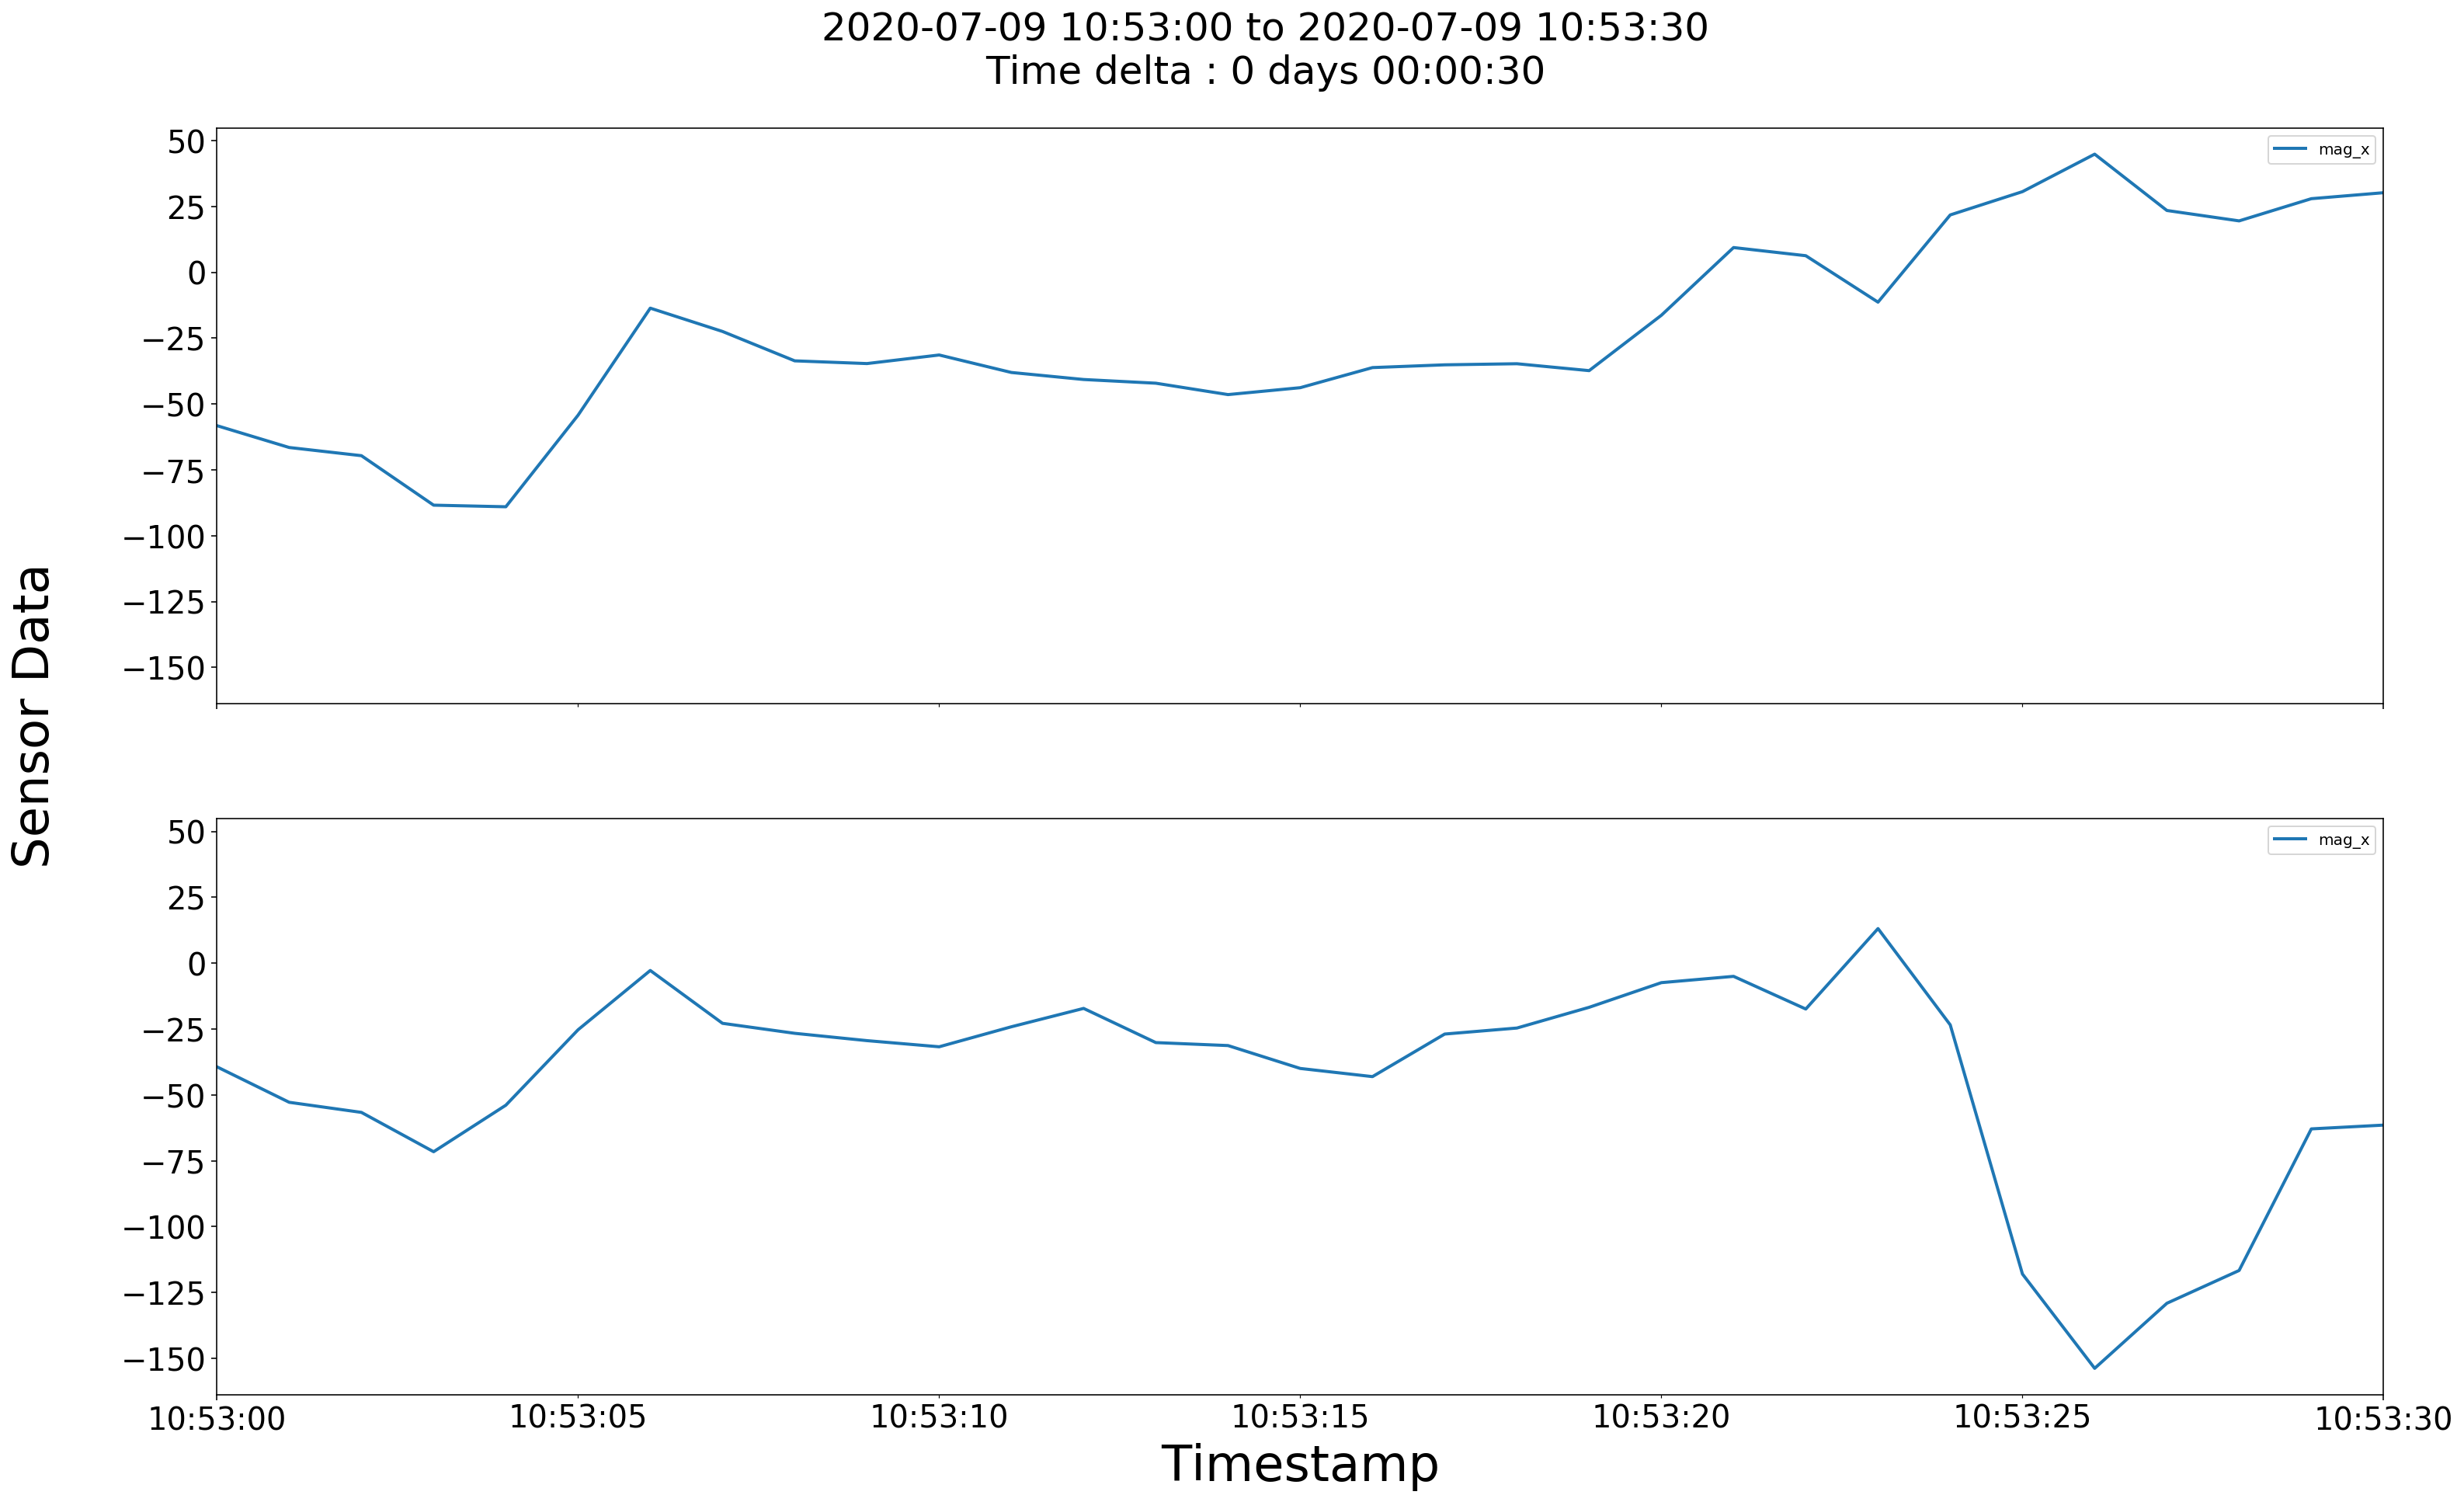

In [37]:
data_processing.plot_data_comp(data_1_ds["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_x']], 
                               data_2_ds["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_x']], 'Timestamp', 'Sensor Data', 
                               'E8508BDFF2AE-F4428F5EB41D', '20200709_195219-20200709_195222_st_5x(ds)')

Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:53:30
Time delta :
 0 days 00:00:30


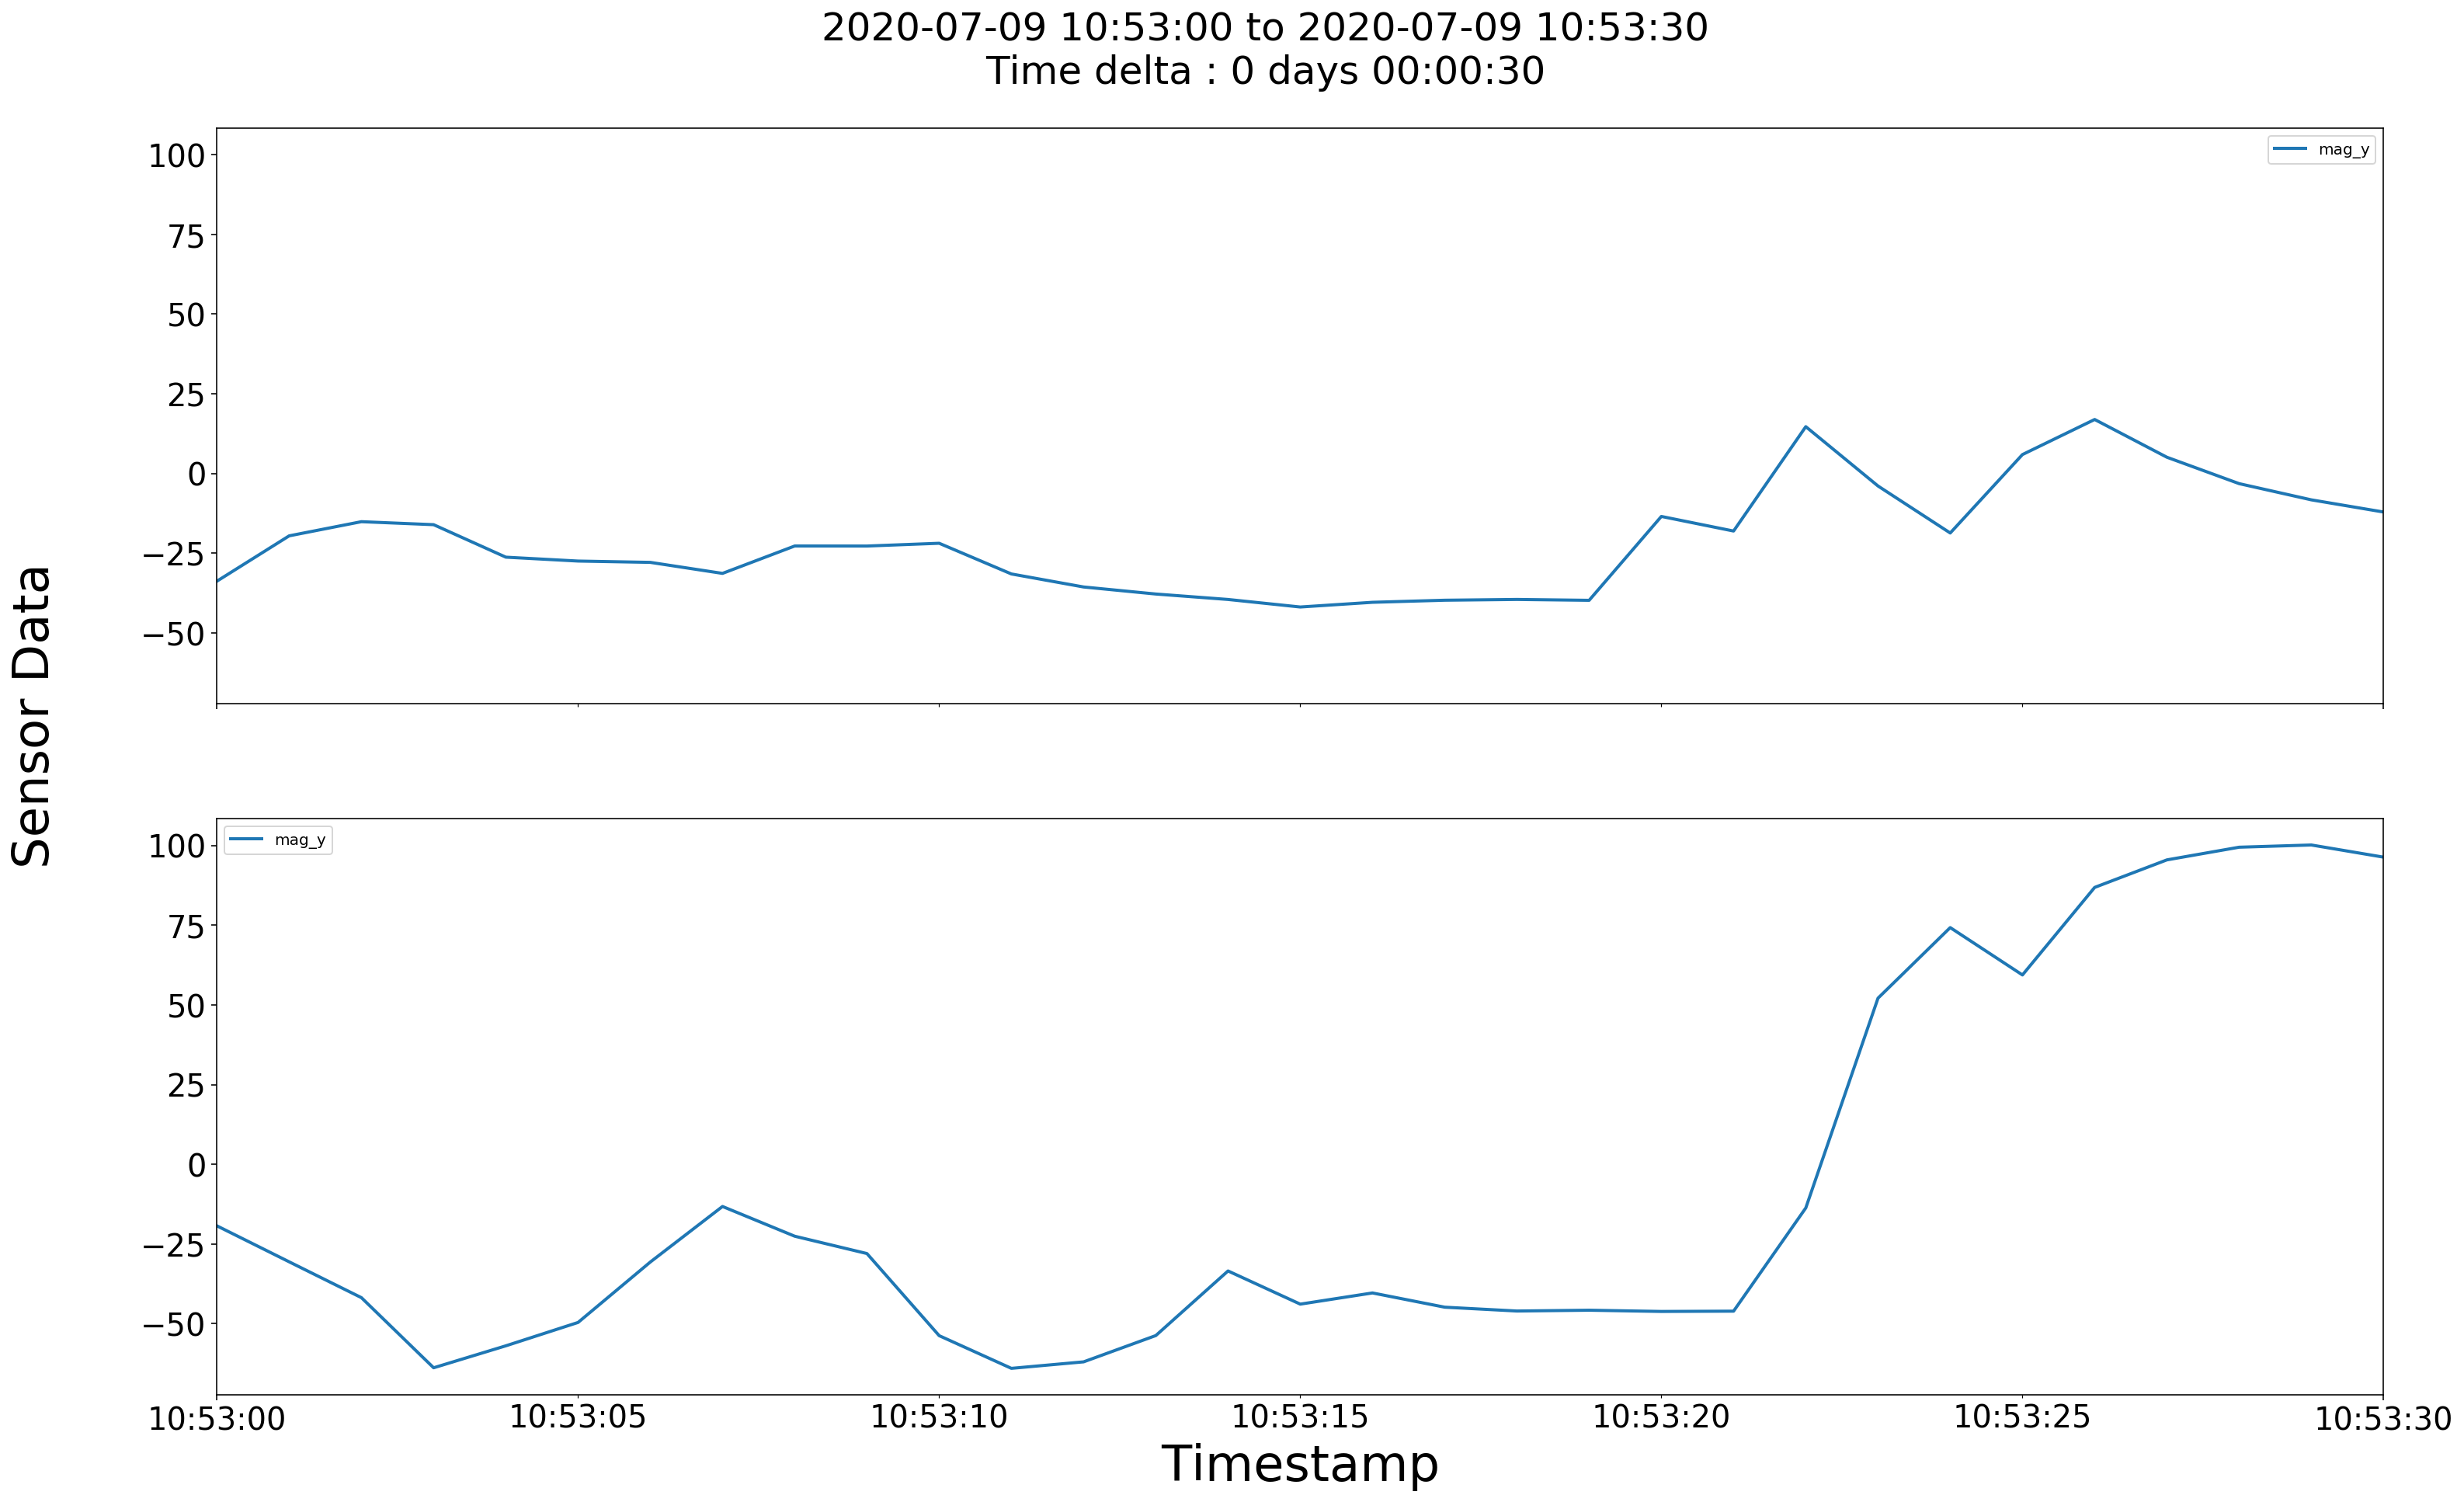

In [38]:
data_processing.plot_data_comp(data_1_ds["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_y']], 
                               data_2_ds["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_y']], 'Timestamp', 'Sensor Data', 
                               'E8508BDFF2AE-F4428F5EB41D', '20200709_195219-20200709_195222_st_5y(ds)')

Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:53:30
Time delta :
 0 days 00:00:30


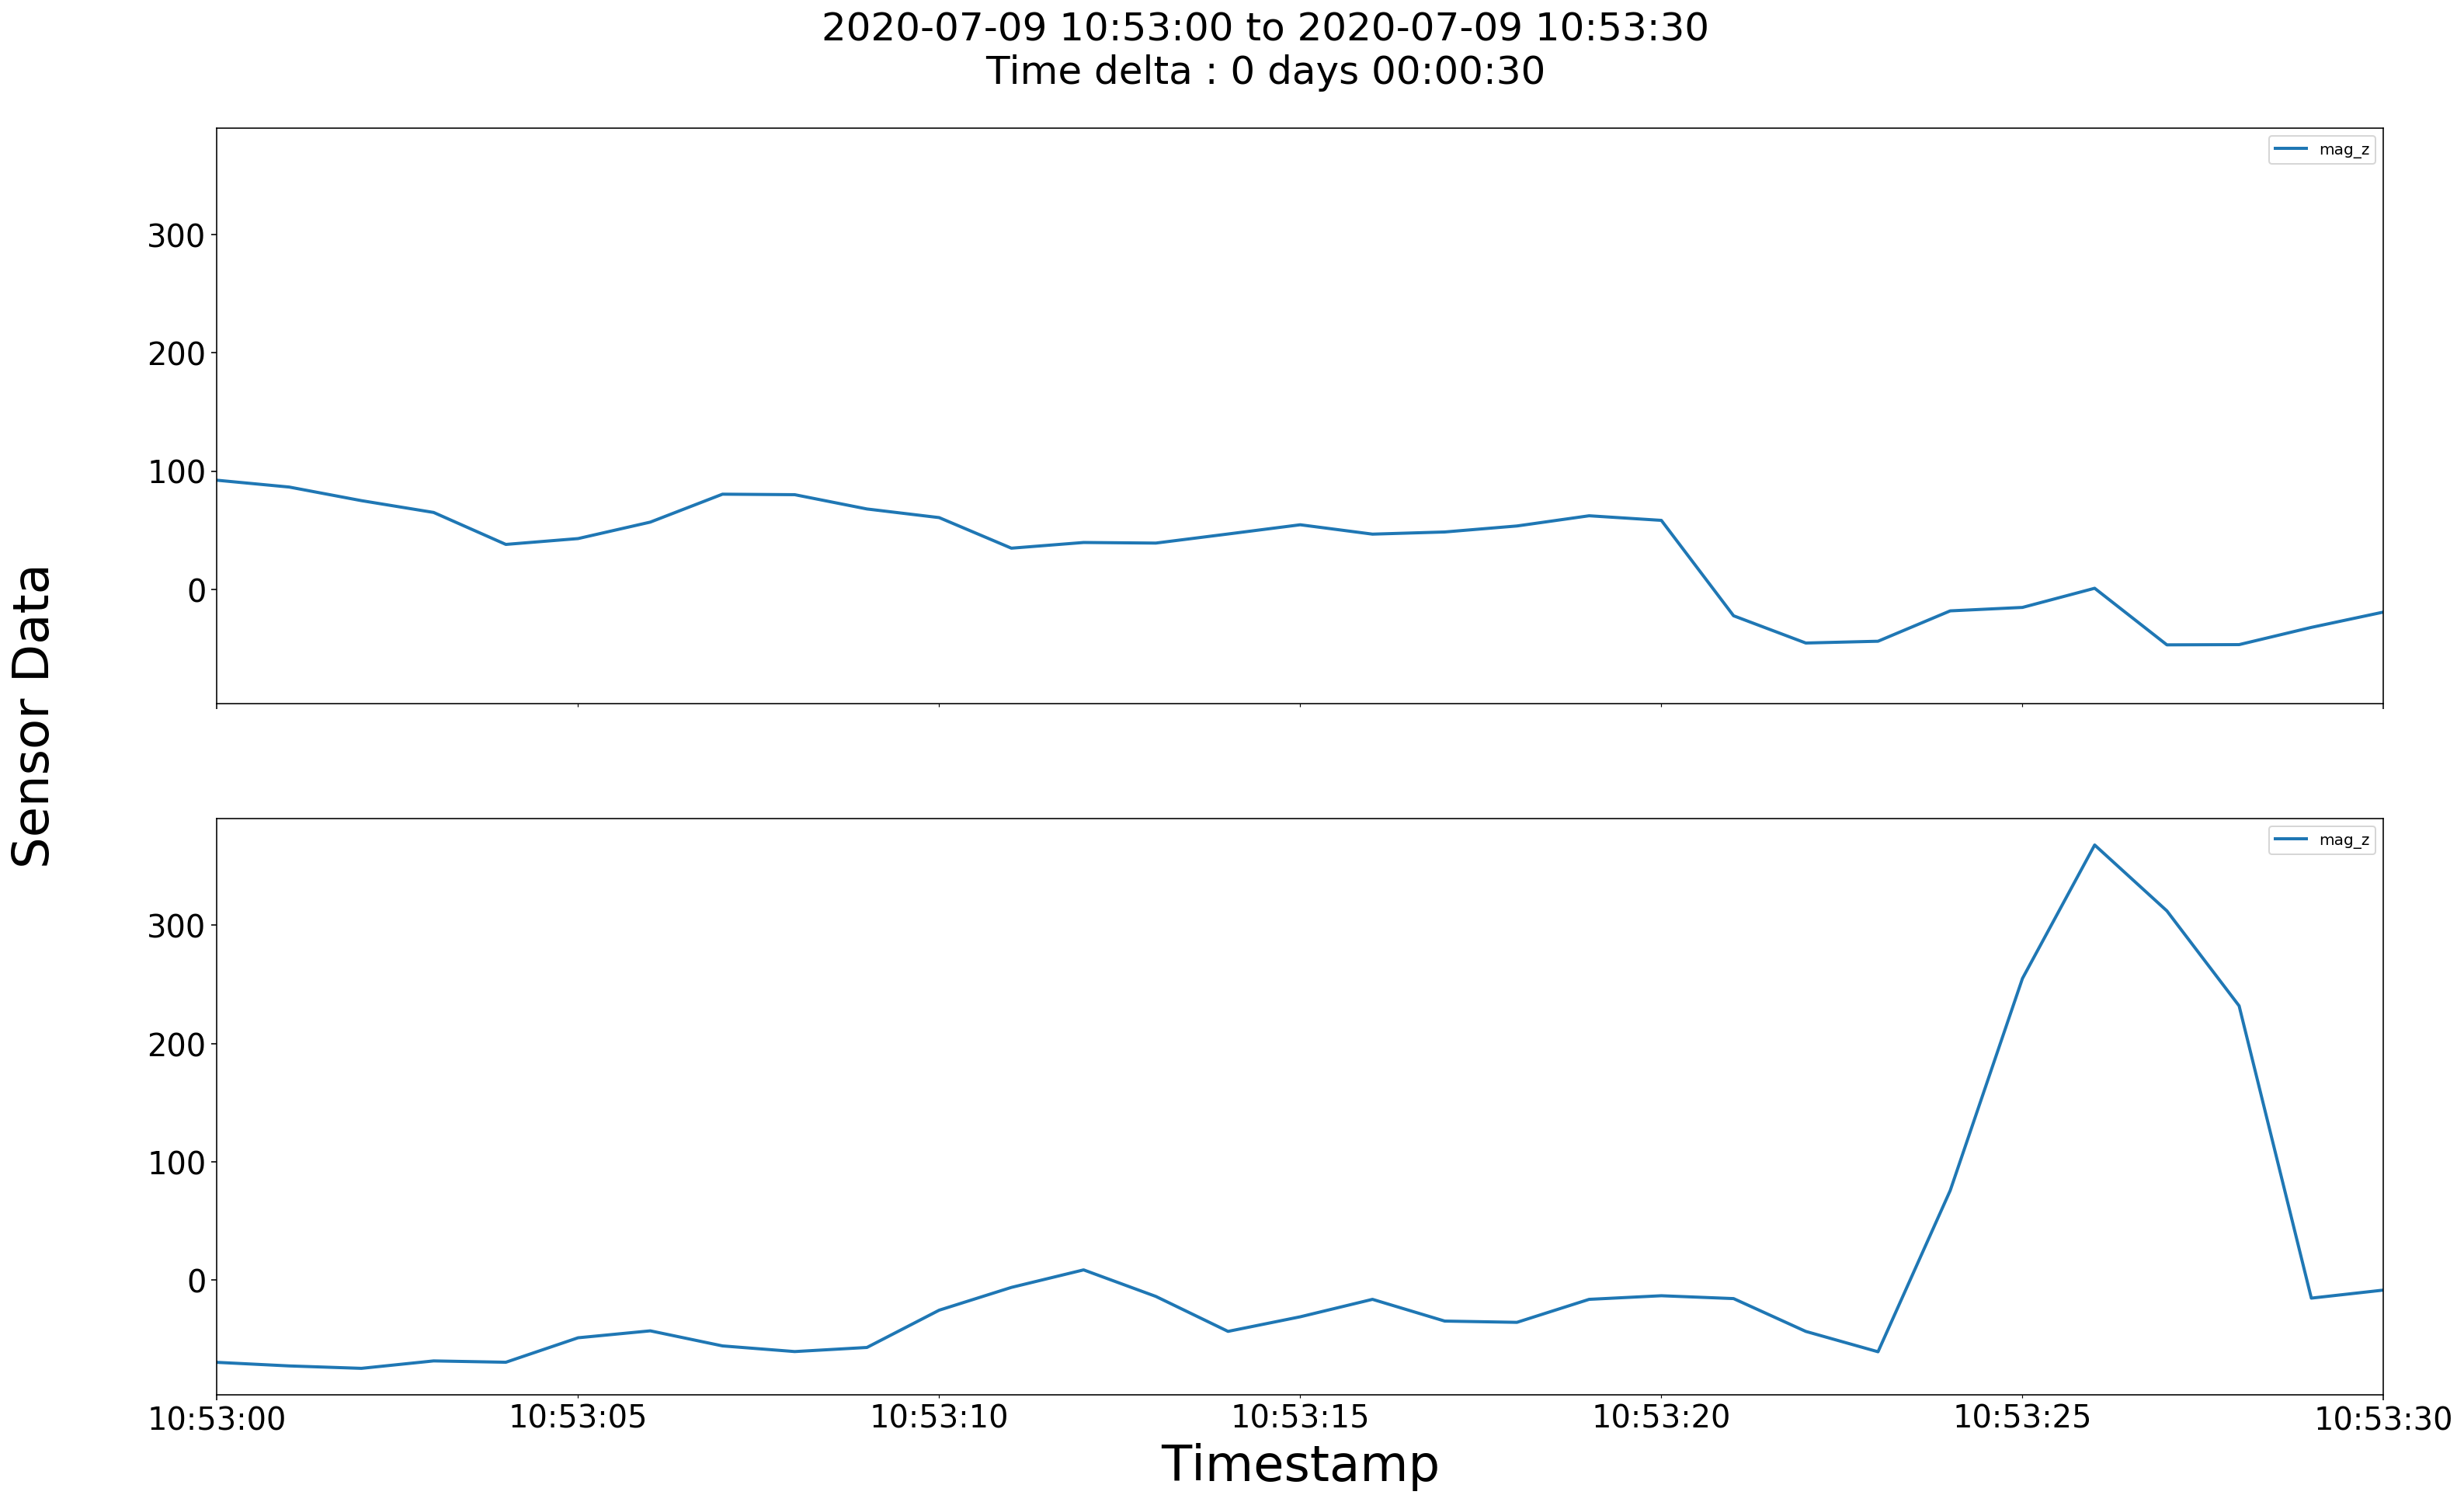

In [39]:
data_processing.plot_data_comp(data_1_ds["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_z']], 
                               data_2_ds["2020-07-09 10:53:00":"2020-07-09 10:53:30"][['mag_z']], 'Timestamp', 'Sensor Data', 
                               'E8508BDFF2AE-F4428F5EB41D', '20200709_195219-20200709_195222_st_5z(ds)')